<a href="https://colab.research.google.com/github/VitorCapelos/imersao-dados-2/blob/main/Imers%C3%A3o_Dados_Microdados_ENEM_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jupyter Notebook** de **análise de dados** sobre os **dados do ENEM 2019** - Vitor Capelos

# *Realizando os primeiros imports, configurando o Jupyter Notebook e consumindo os microdados do INEP*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def config_jypter():
  %matplotlib inline
  %pylab inline
  
  plt.style.use( 'bmh' )
  plt.rcParams['figure.figsize'] = [25, 12]
  plt.rcParams['font.size'] = 24
  
  pd.options.display.max_columns = None
  pd.options.display.max_rows = None
  pd.set_option( 'display.expand_frame_repr', False )
  
  sns.set()

fonte = ('https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true')
dados = pd.read_csv(fonte)

config_jypter()
dados.head()

Populating the interactive namespace from numpy and matplotlib


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,506.0,509.0,514.0,517.0,435.6,512.3,488.6,432.4,DACDDEDEDAADCBCBDBDBBBDCCACDECADCCCBCBACCCCEA,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,1,1,0,NaN,508.0,512.0,NaN,NaN,409.3,375.3,NaN,NaN,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,503.0,508.0,512.0,515.0,423.2,499.1,441.0,427.2,DDEACAECCC*BCDBAACDACCBAEBBCEEEAECABBCECBBEAA,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,19000100473

# *Funções para gerar colunas de renda per capita, inserções de domínios e classe econômica dos inscritos*

In [3]:
def geraListaPerCapita(dfPrincipal): 
        quantidadeERenda = dfPrincipal[["Q005","Q006"]]
        Q006RendaMaxima = {'A': 0,'B': 998,'C': 1497,'D': 1996,'E': 2495,'F': 2994,'G': 3992,'H': 4990,'I': 5988,'J': 6986,'K': 7984,'L': 8982,'M': 9980,'N': 11976,'O': 14970,'P': 19960,'Q': 24950}
        listaPerCapita = list()
        for quantidade, renda in quantidadeERenda.values:
            listaPerCapita.append(round(Q006RendaMaxima[renda]/quantidade))
        return listaPerCapita

def insereDominio(listaCampos, listaId, listaDescricao):

  novosCampos = pd.DataFrame({'NU_INSCRICAO' : dados['NU_INSCRICAO'].values})  
  for campo in listaCampos:
      novoCampo = '{}{}'.format(campo,'_DESC')
      dominio = {campo: listaId, novoCampo : listaDescricao}
      dfDominio = pd.DataFrame(dominio,columns=dominio.keys())
      valores = pd.merge(dados,dfDominio, on = campo, how= 'left')[novoCampo].values
      novosCampos[novoCampo] = valores
  return novosCampos
        
# Função criada por fernandino.tavares@gmail.com | https://colab.research.google.com/drive/1rSzmdSQcgjmF13IExv_I-lfx4SoJYNdJ#scrollTo=PJdXX1perLp7

def geraClasseSocial():
  conditions = [ (dados['IN_PERCAPITA'] <= 1254),
    (dados['IN_PERCAPITA'] >= 1255) & (dados['IN_PERCAPITA'] <= 2004),
    (dados['IN_PERCAPITA'] >= 2005) & (dados['IN_PERCAPITA'] <= 8640),
    (dados['IN_PERCAPITA'] >= 8641) & (dados['IN_PERCAPITA'] <= 11261),
    (dados['IN_PERCAPITA'] >= 11262)]

  choices = ['E', 'D', 'C', 'B', 'A']
  dados['IN_CLASSE'] = np.select(conditions, choices, default='black')

# Criando uma coluna que lista as pessoas dentro de sua classe social

# *Iniciando as funções e configurando o Data Frame*

In [129]:
dados['IN_PERCAPITA'] = geraListaPerCapita(dados)

provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados["NU_NOTA_MEDIA"] = dados[provas].sum(axis=1) / 5
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)


nota_sem_zero = dados.query('NU_NOTA_TOTAL != 0')

geraClasseSocial()

dfDominio = pd.merge(dados,insereDominio(['TP_COR_RACA'],[0,1,2,3,4,5], ['Não declarado','Branca','Preta','Parda','Amarela','Indígena']), on = 'NU_INSCRICAO')
dfDominio = pd.merge(dados,insereDominio(['Q001','Q002'],['A','B','C','D','E','F','G','H'] , ['Nunca estudou.','Não completou a 4ª série/5º ano do Ensino Fundamental.','Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.','Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.','Completou o Ensino Médio, mas não completou a Faculdade.','Completou a Faculdade, mas não completou a Pós-graduação.','Completou a Pós-graduação.','Não sei.']), on = 'NU_INSCRICAO')

dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,IN_PERCAPITA,NU_NOTA_MEDIA,NU_NOTA_TOTAL,IN_CLASSE,TXT_AUTISMO,TXT_DISLEXIA,TXT_LOCALIZACAO_ESC,TXT_ESCOLA,TXT_DEPENDENCIA_ADM_ESC,TXT_COR_RACA
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,506.0,509.0,514.0,517.0,435.6,512.3,488.6,432.4,DACDDEDEDAADCBCBDBDBBBDCCACDECADCCCBCBACCCCEA,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,250,457.78,2288.9,E,Não,Não,NaN,Não respondeu,NaN,Parda
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,1,1,0,NaN,508.0,512.0,NaN,NaN,409.3,375.3,NaN,NaN,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,250,236.92,1184.6,E,Não,Não,NaN,Não respondeu,NaN,Parda
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,503.0,508.0,512.0,515.0,423.2,499.1,441.0,427.2,DDEACAECCC*BCDBAACDACCBAEBBCEEEAECABBCECBBEAA,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBC

# Ínicio da análise

*Este é uma análise dos dados do ENEM 2019 feitas com base em uma amostra colhida pela Alura, e instigada como proposta ou desafio dentro de uma semana da "Imersão Dados"*
---

Esta é, portanto, uma análise dos inscritos do ENEM 2019, tentando compreender e retirar questões relevantes, ácidas ou pelo menos intrigantes. Foi visualizado média de notas, notas totais, faltante e não faltante, transtornos mentais, questões de gêneros e entre outas faixas que podem, ou não, resultar em conflitos, disputas ou, no mínimo, diferença de resultado final em seu exame. Espero que você se sinta instigado e incomodado com o que pode ser extraído daqui. Obrigado pela leitura e atenção!




# Participantes, estados, médias, notas totais

1.   Quantos participantes nós temos?
2.   Quantos por estado?
3.   Qual a média de notas dos estados?
4.   Quantos participantes faltaram?

Estes foram os primeiros pontos que eu decidi atacar e entender, e podemos dizer que os resultados foram os esperados.



In [5]:
len(dados) # Candidatos inscritos

127380

Primeiro entendemos qual o tamanho da nossa amostra, e sabemos agora que são *127.380* participantes dentro do *dataset*.


In [6]:
len(nota_sem_zero) # Candidatos inscritos que não faltaram

98218

Se realizarmos uma filtragem daqueles alunos que faltaram, ou seja, não realizaram pelo menos alguma prova, vemos que os participantes caem bruscamente para *98.218*. Neste momento nós retiramos *29.162* faltantes, e alguns momentos vou tentar demonstrar o por que esse tipo de filtro pode ser e vai ser relevante.

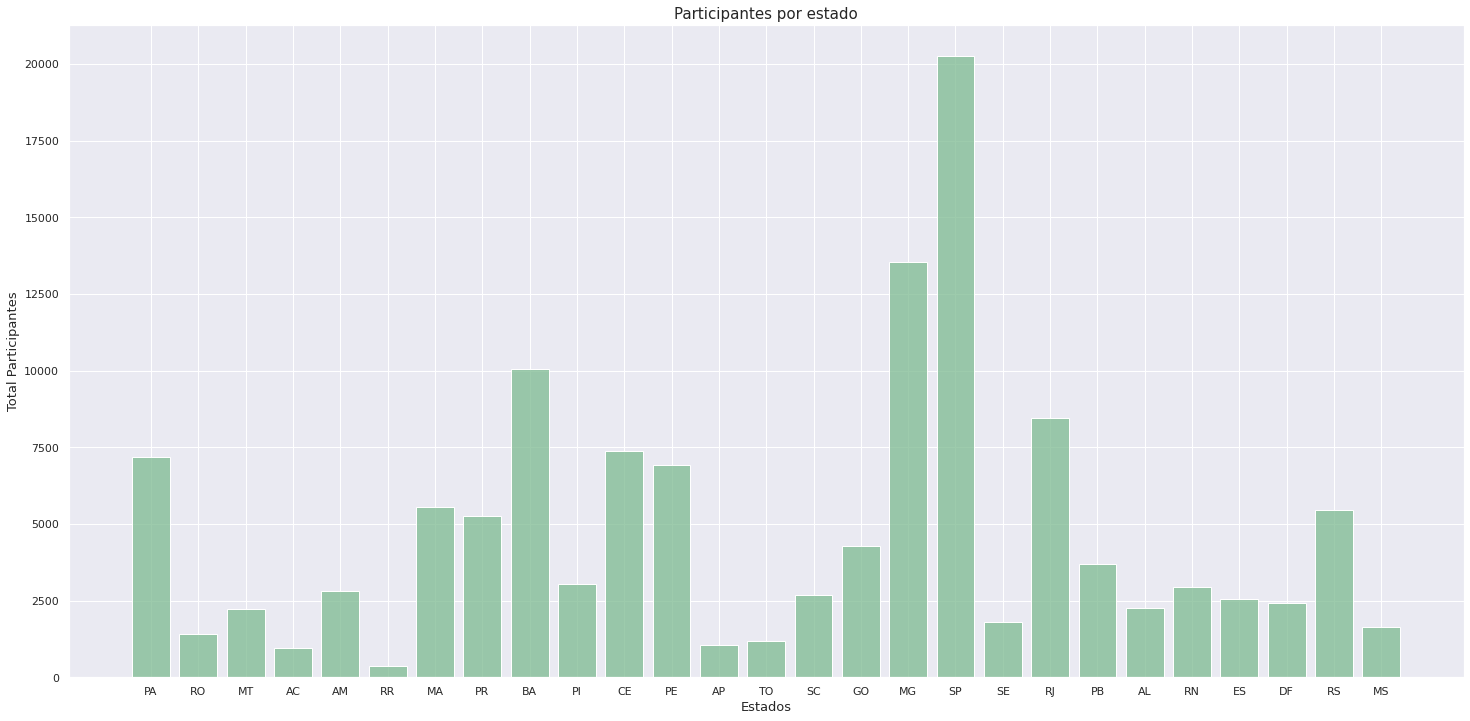

In [7]:
plt.title('Participantes por estado', fontsize= 15)
plt.ylabel('Total Participantes', fontsize= 13)
plt.xlabel('Estados', fontsize= 13)
sns.set_theme(style='darkgrid')
sns.set_palette('crest')
sns.histplot(x='SG_UF_RESIDENCIA', data=dados, shrink=.8, palette='crest')

Dê inicio entendemos qual a população da nossa amostra. A maior parte dos participantes são do estado de **São Paulo**, **Minas Gerais** e **Bahia**.


1.   São Paulo -    *20.264*
2.   Minas Gerais - *13.547*
3.   Bahia -        *10.040*



In [8]:
dados['SG_UF_RESIDENCIA'].value_counts() # Participantes por estado

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

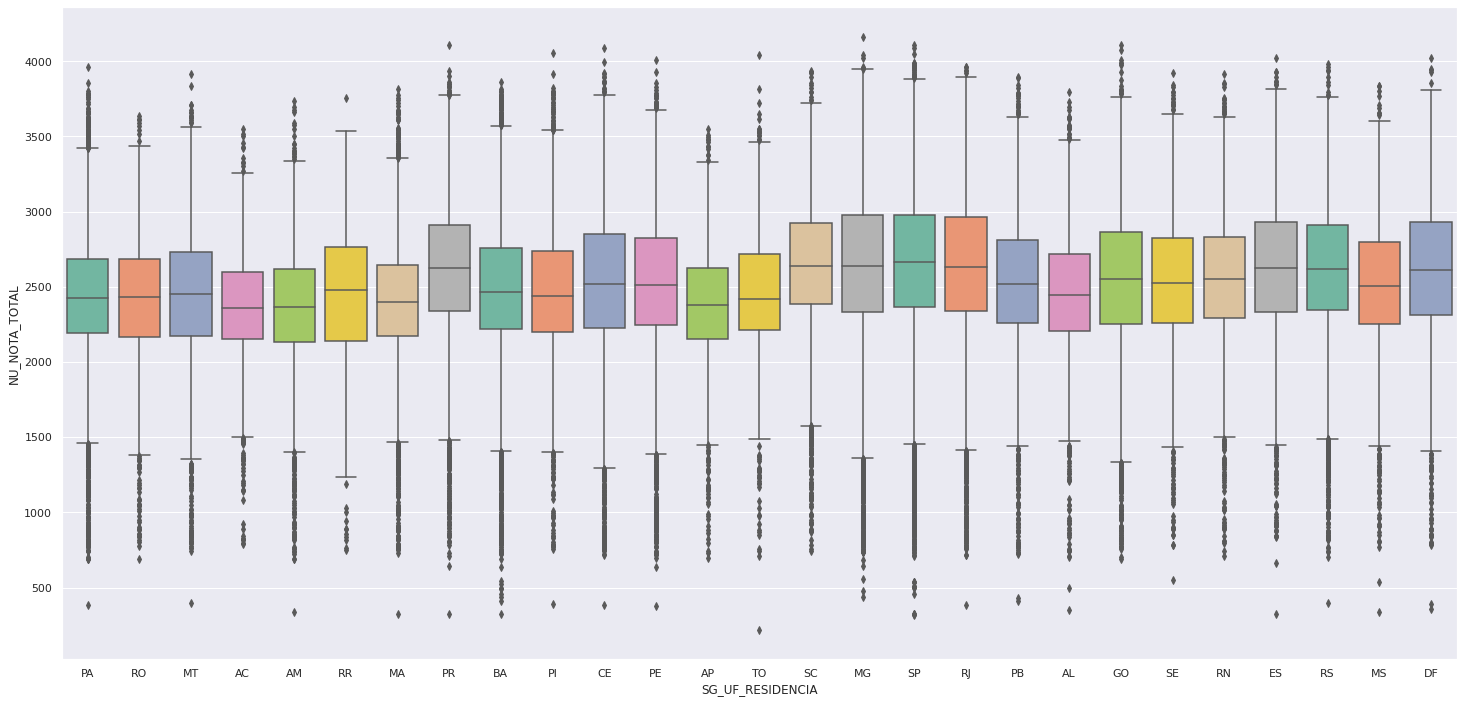

In [9]:
sns.boxplot(x='SG_UF_RESIDENCIA', y='NU_NOTA_TOTAL', data= nota_sem_zero, palette='Set2')

In [10]:
dados.query('SG_UF_RESIDENCIA == "SP"')['NU_NOTA_TOTAL'].describe() 

count    20264.000000
mean      2030.874753
std       1200.620485
min          0.000000
25%       1388.325000
50%       2490.550000
75%       2873.200000
max       4109.400000
Name: NU_NOTA_TOTAL, dtype: float64

In [11]:
dados.query('SG_UF_RESIDENCIA == "MG"')['NU_NOTA_TOTAL'].describe()

count    13547.000000
mean      2031.711272
std       1194.944318
min          0.000000
25%       1462.800000
50%       2459.200000
75%       2864.700000
max       4164.100000
Name: NU_NOTA_TOTAL, dtype: float64

In [12]:
dados.query('SG_UF_RESIDENCIA == "SC"')['NU_NOTA_TOTAL'].describe()

count    2673.000000
mean     2032.650767
std      1171.486498
min         0.000000
25%      1451.900000
50%      2500.100000
75%      2843.300000
max      3938.300000
Name: NU_NOTA_TOTAL, dtype: float64

O estado de **São Paulo** e **Minas Gerais** mantiveram notas próximas as de **Santa Catarina**, **Espirito Santo** e **Paraná**.

Como os resultados foram próximos aos esperados, vide melhores escolas do ENEM são de [São Paulo e Minas Gerais](https://exame.com/brasil/as-50-melhores-escolas-de-cada-estado-do-brasil-no-enem/).
---
Então eu procurei outras áreas para explorar e instigar discussões. Questões de gênero, etinia ou cor e até a sua predisposição de escolaridade alta com base em sua família.

# Discussões e disparidade de gênero

1.   Quantas inscritas e inscritos nós temos na nossa amostra?
2.   Qual a média de notas e a diferença delas entre gênero?
3.   Existe diferença no desempenho entre homens e mulheres?
4.   Onde as mulheres mais estudam?

In [13]:
dados['TP_SEXO'].value_counts()

F    75883
M    51497
Name: TP_SEXO, dtype: int64

In [74]:
dados.query('TP_SEXO == "F"')[['TP_SEXO', 'TP_DEPENDENCIA_ADM_ESC']].value_counts(normalize=True) * 100

TP_SEXO  TP_DEPENDENCIA_ADM_ESC
F        2.0                       82.039216
         4.0                       13.224736
         1.0                        3.921569
         3.0                        0.814480
dtype: float64

In [60]:
dados.query('TP_SEXO == "M"')[['TP_SEXO', 'TP_DEPENDENCIA_ADM_ESC']].value_counts(normalize=True) * 100

TP_SEXO  TP_DEPENDENCIA_ADM_ESC
M        2.0                       77.547295
         4.0                       16.528377
         1.0                        4.928643
         3.0                        0.995685
dtype: float64

Sabemos agora que temos mais inscritas, sendo *75.883* participantes mulheres e *51.497*. *As mulheres* ocupam, majoritariamente em maior quantidade, todos os ambientes escolares, porém ***82%*** delas estudam em **escolas Estaduais**, contra ***77%*** dos homens. Se pudermos usar o desempenho de escolas públicas como inferiores aos desempenhos de escolas particulares, enxergamos, apartir daqui, uma diferença de oportuniade de gênero.

Text(0.5, 0, 'Sexo')

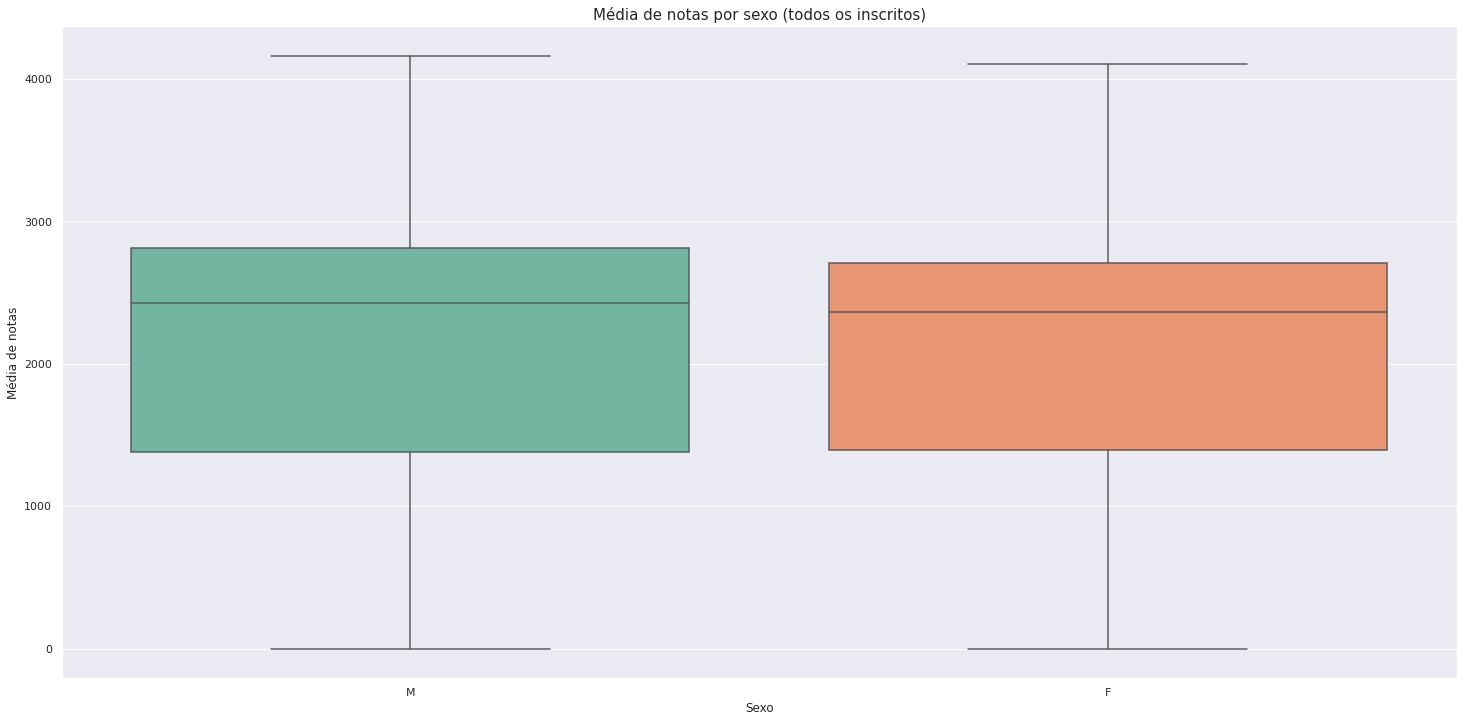

In [82]:
sns.boxplot(x='TP_SEXO', y='NU_NOTA_TOTAL', data= dados, palette='Set2')

plt.title('Média de notas por sexo (todos os inscritos)', fontsize= 15)
plt.ylabel('Média de notas')
plt.xlabel('Sexo')

In [17]:
dados.query('TP_SEXO == "M"')['NU_NOTA_MEDIA'].describe()

count    51497.000000
mean       397.785892
std        235.403274
min          0.000000
25%        275.580000
50%        484.820000
75%        562.620000
max        832.820000
Name: NU_NOTA_MEDIA, dtype: float64

In [18]:
dados.query('TP_SEXO == "F"')['NU_NOTA_MEDIA'].describe()

count    75883.000000
mean       388.189662
std        228.396698
min          0.000000
25%        278.890000
50%        472.840000
75%        541.960000
max        821.240000
Name: NU_NOTA_MEDIA, dtype: float64

Percebemos uma leve atenuação com média superior nos inscritos homens dentro da nossa amostra, com o quartil masculino entre o ***275.58*** e ***565.62***, com máxima de ***832.82***. Já o quartil feminino entre ***278.89*** e ***541.96***, com máxima de ***821.24***. Tendo esta disparidade, eu me pergunto, o por que essa diferença existe?. Já é de tempos que vemos análises que invocam essa discussão, como essa leitura do [Estadão](https://infograficos.estadao.com.br/educacao/enem/desigualdades-de-genero-e-raca/#:~:text=Independentemente%20da%20raça%2C%20homens%20têm,é%20considerada%20significativa%20por%20estatísticos). 

Text(0.5, 0, 'Sexo')

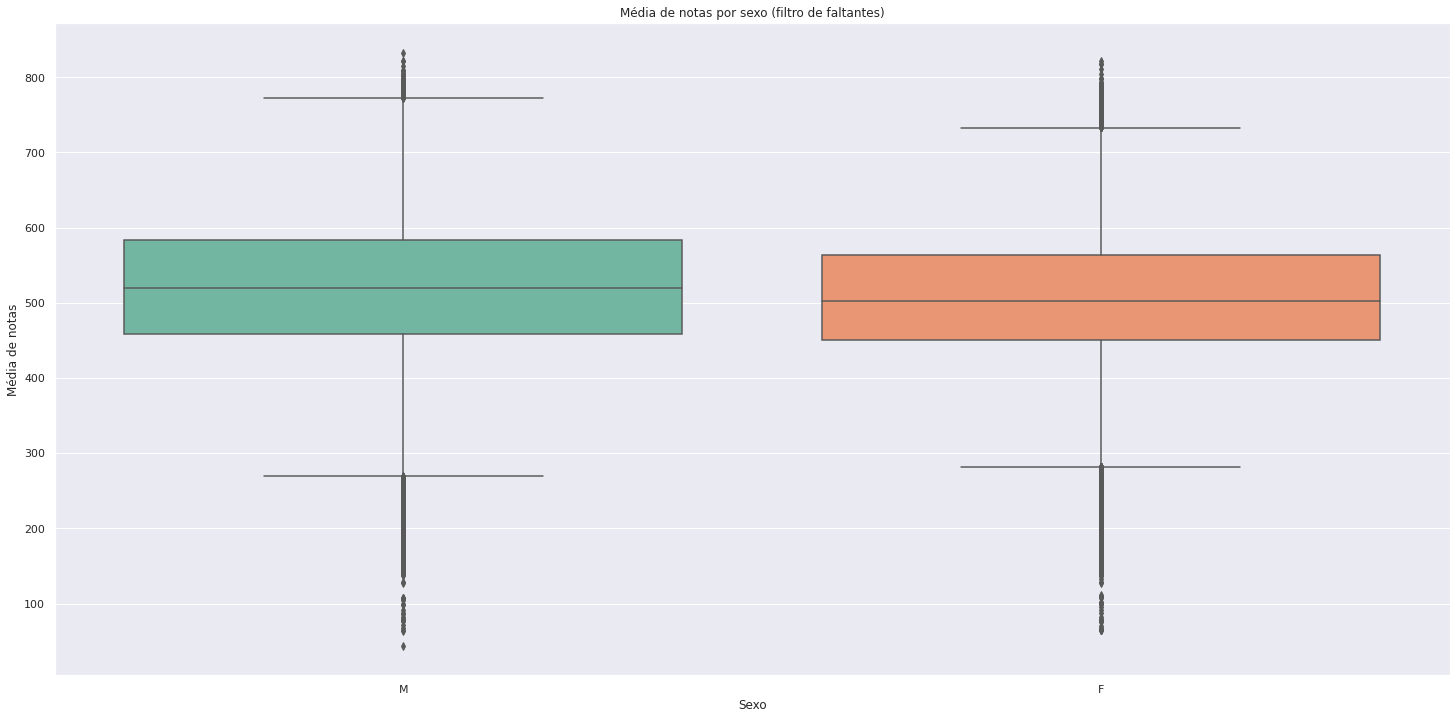

In [19]:
sns.boxplot(x='TP_SEXO', y='NU_NOTA_MEDIA', data= nota_sem_zero, palette='Set2')

plt.title('Média de notas por sexo (filtro de faltantes)')
plt.ylabel('Média de notas')
plt.xlabel('Sexo')

In [20]:
nota_sem_zero.query('TP_SEXO == "M"')['NU_NOTA_MEDIA'].describe()

count    39670.000000
mean       516.379633
std        103.417706
min         44.000000
25%        457.940000
50%        519.800000
75%        583.755000
max        832.820000
Name: NU_NOTA_MEDIA, dtype: float64

In [85]:
nota_sem_zero.query('TP_SEXO == "F"')['NU_NOTA_MEDIA'].describe()

count    58548.000000
mean       503.125574
std         98.905286
min         64.400000
25%        450.840000
50%        502.760000
75%        563.780000
max        821.240000
Name: NU_NOTA_MEDIA, dtype: float64

Decidimos filtrar os alunos faltantes e deixar pelo menos aqueles que fizeram pelo menos alguma prova, e nessa situação o aspecto muda bruscamente, deixando o quartil com desempenhos mais relevantes e superiores, sendo os resultados de homens e mulheres, respectivamente, entre ***457.94*** e ***583.75***, com máxima de ***832.82*** e entre ***450.76*** e ***563.78*** e máxima de ***821.24***.

Como bem sabemos "*homens e mulheres, embora com cérebros diferentes, as capacidades cognitivas são as mesmas, e não existe diferença entre raciocionio lógico, muito menos na inteligência*" [[Estadão](https://infograficos.estadao.com.br/educacao/enem/desigualdades-de-genero-e-raca/#:~:text=Independentemente%20da%20raça%2C%20homens%20têm,é%20considerada%20significativa%20por%20estatísticos)]. Na realidade, "*o que se espera das meninas é uma melhor capacidade de se comunicar e se expressar, e não que saiam bem em Matemática*" afirma Priscila, presidente do Movimento Todos Pela Educação. Será que a visão do estereótipo da Priscila é real?! 

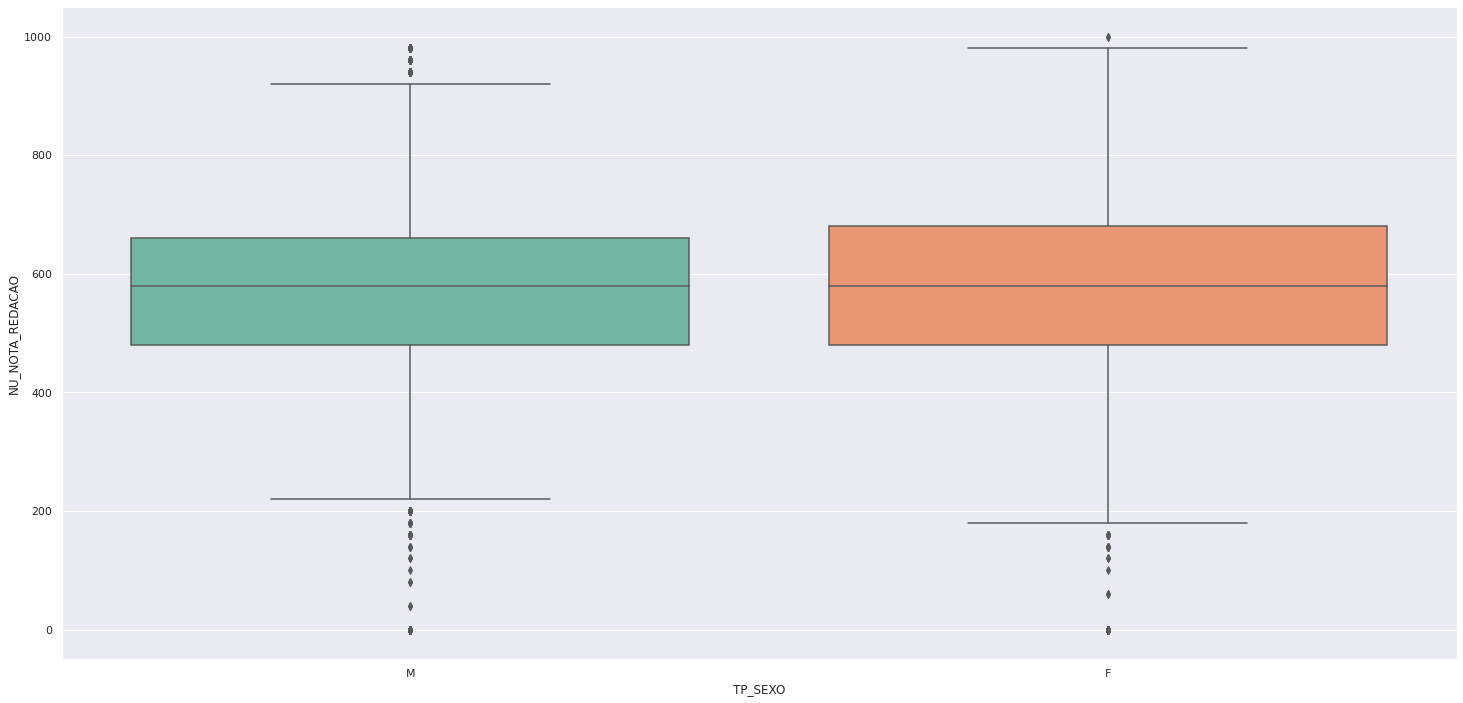

In [90]:
sns.boxplot(x= 'TP_SEXO', y= 'NU_NOTA_REDACAO', data= nota_sem_zero, palette='Set2')

In [83]:
nota_sem_zero.query('TP_SEXO == "F"')['NU_NOTA_REDACAO'].describe()

count    58434.000000
mean       577.761919
std        187.318067
min          0.000000
25%        480.000000
50%        580.000000
75%        680.000000
max       1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

In [84]:
nota_sem_zero.query('TP_SEXO == "M"')['NU_NOTA_REDACAO'].describe()

count    39568.000000
mean       563.018095
std        188.049084
min          0.000000
25%        480.000000
50%        580.000000
75%        660.000000
max        980.000000
Name: NU_NOTA_REDACAO, dtype: float64

Buscando o desempenho de homens e mulheres na prova de redação a gente percebe que, realmente, mulheres tem desempenho superior aos homens no aspecto de povas descritivas. O quartil das mulheres está entre **480.0** e **680.0**, com máxima de **1000.0**, nota máxima de redação no ENEM, contraposto a diferença de **480.0** e **660.0**, com máxima de **980.0**

In [ ]:
dados[['TP_SEXO', 'SG_UF_RESIDENCIA']].value_counts(normalize= True) * 100

TP_SEXO  SG_UF_RESIDENCIA
F        SP                  9.364892
M        SP                  6.543413
F        MG                  6.484534
         BA                  4.979589
M        MG                  4.150573
F        RJ                  3.927618
         PA                  3.416549
         PE                  3.266604
         CE                  3.249333
M        BA                  2.902339
         RJ                  2.719422
F        MA                  2.592244
         RS                  2.580468
M        CE                  2.545141
F        PR                  2.374784
M        PA                  2.212278
         PE                  2.182446
F        GO                  2.024651
M        MA                  1.759303
         PR                  1.753808
         RS                  1.710630
F        PB                  1.695714
         PI                  1.439001
         RN                  1.328309
M        GO                  1.325954
F        AM             

Text(0.5, 0, 'Estado')

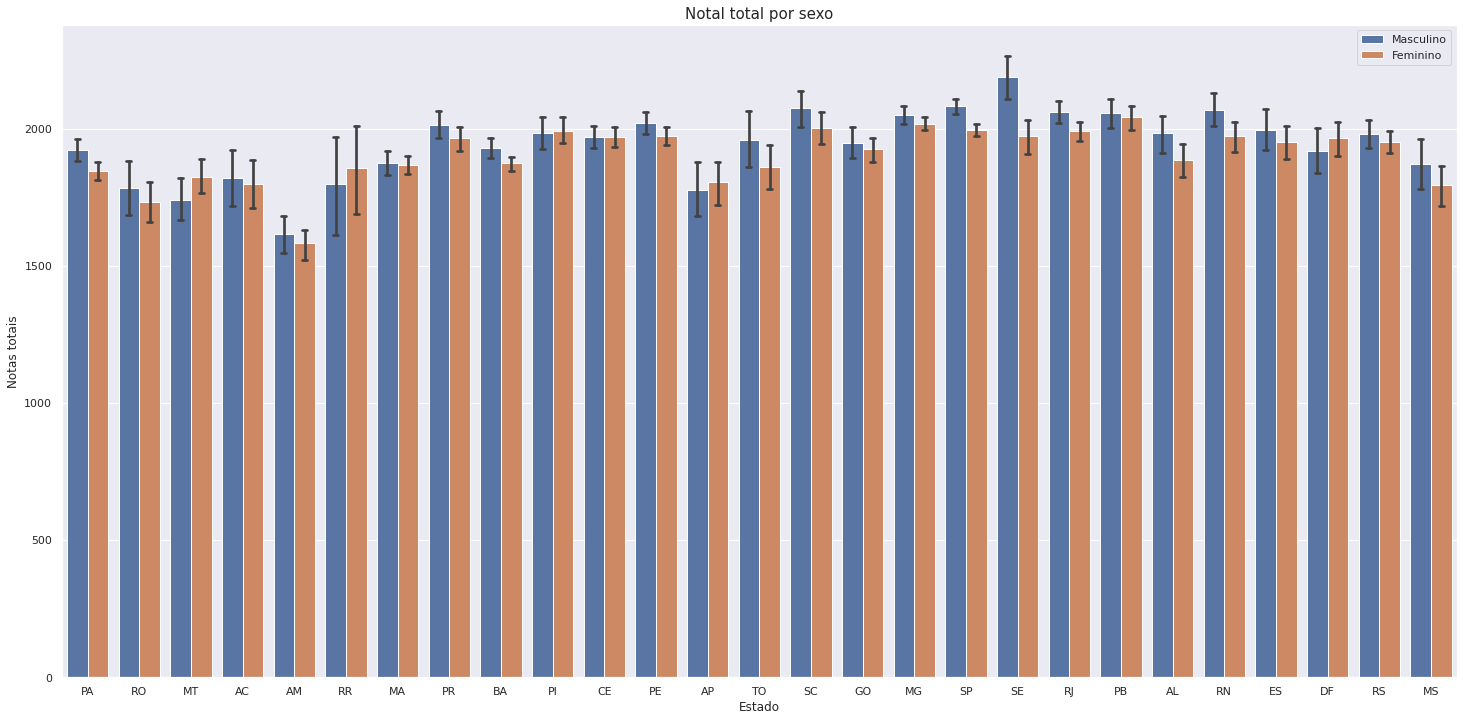

In [22]:
sns.barplot(x='SG_UF_RESIDENCIA', y='NU_NOTA_TOTAL', data= dados, palette='deep', hue='TP_SEXO', capsize=.1)

L = plt.legend()
L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')

plt.title('Notal total por sexo', fontsize=15)
plt.ylabel('Notas totais')
plt.xlabel('Estado')

Separamos o desempenho de cada estado e contrastamos os sexos dos participantes, e encontramos resultados individuais significantes nos estados de **Sergipe**, **Rio Grande do Norte**, **São Paulo** e ***Santa Catarina***. Vêmos também que os maiores resultados individuais estão entre as duas cidades do *nordeste brasileiro*, Sergipe e Rio Grande do Norte.

In [23]:
nota_sem_zero.query('SG_UF_RESIDENCIA == "AM"')['TP_DEPENDENCIA_ADM_ESC'].value_counts()

2.0    435
4.0     38
1.0     31
Name: TP_DEPENDENCIA_ADM_ESC, dtype: int64

O pior resultado encontrado é o do **Amazonas**, estado do *noroeste do Brasil*, sendo a maior parte dos inscritos estudantes de escolas estaduais, com o desempenho abaixo de **508** de média, com base na lista das 100 melhores escolas de Manaus no ENEM, onde as estaduais só começam a aparecer no índice 34. [Acesso no link](https://blogdoenem.com.br/resultado-enem-manaus/)

# Média dos alunos entre escolas urbanas e rurais

Text(0.5, 1.0, 'Média de notas por sexo em escolas urbanas ou rurais')

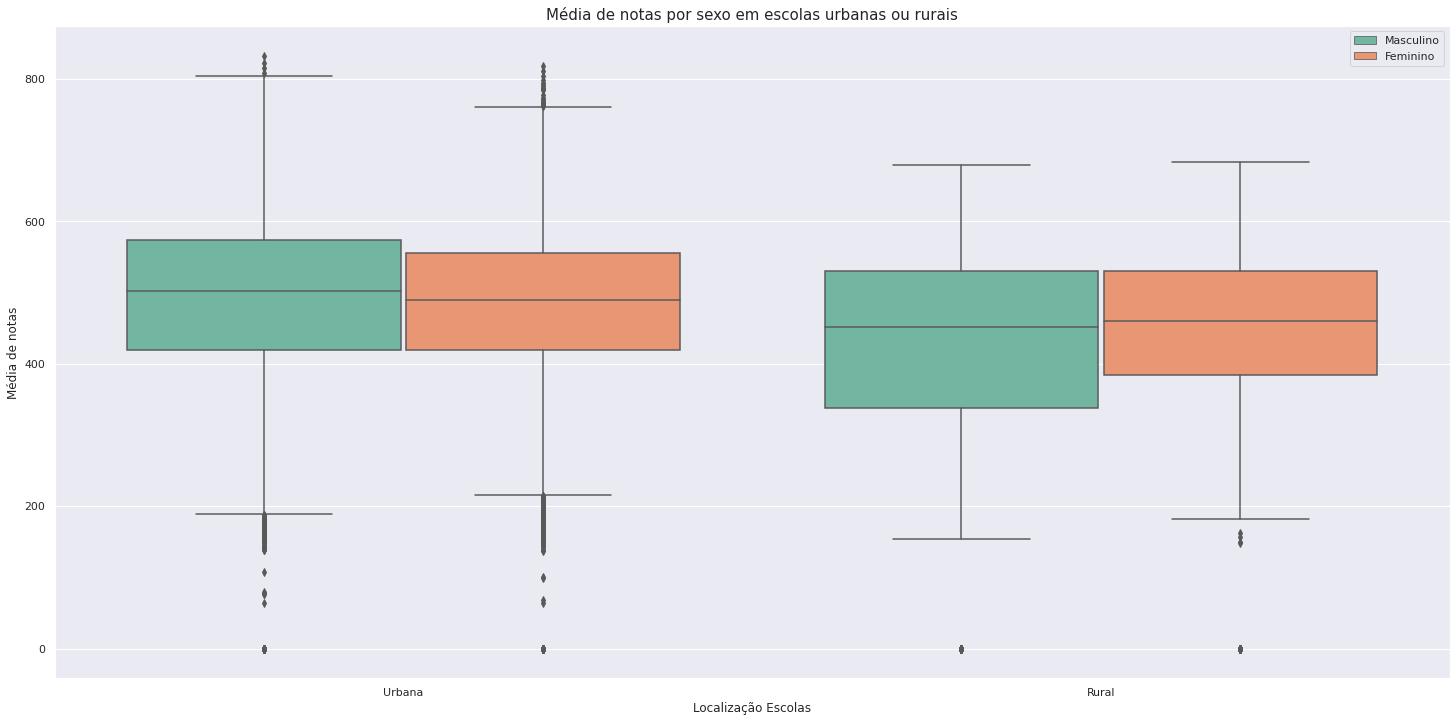

In [115]:
dados['TXT_LOCALIZACAO_ESC']=pd.cut(
   dados['TP_LOCALIZACAO_ESC'],
   bins=[0, 1, 2],
   labels=['Urbana', 'Rural']
)


sns.boxplot(x='TXT_LOCALIZACAO_ESC', y='NU_NOTA_MEDIA', data= dados, hue='TP_SEXO', palette='Set2')

L = plt.legend()
L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')

plt.ylabel('Média de notas')
plt.xlabel('Localização Escolas')
plt.title('Média de notas por sexo em escolas urbanas ou rurais', fontsize= 15)

Os participantes de escolas consideradas urbanas tem desempenho superior as de escolas rurais, enquanto os quartis de escolas rurais puxam as médias para baixo (como já vimos em gráficos anteriores), as escolas urbanas tem disparidade entre homens e mulheres no quesito desempenho.

In [118]:
dados[['TP_SEXO', 'TP_LOCALIZACAO_ESC']].value_counts(normalize= True) * 100

TP_SEXO  TP_LOCALIZACAO_ESC
F        1.0                   55.838893
M        1.0                   40.657421
F        2.0                    2.060991
M        2.0                    1.442694
dtype: float64

In [119]:
dados.query('TP_SEXO == "F"')['TP_LOCALIZACAO_ESC'].value_counts(normalize= True) * 100

1.0    96.440422
2.0     3.559578
Name: TP_LOCALIZACAO_ESC, dtype: float64

In [ ]:
dados

# Propensão familiar e seu impacto no desempenho

Text(0.5, 0.98, 'Nota e escolaridade dos pais')

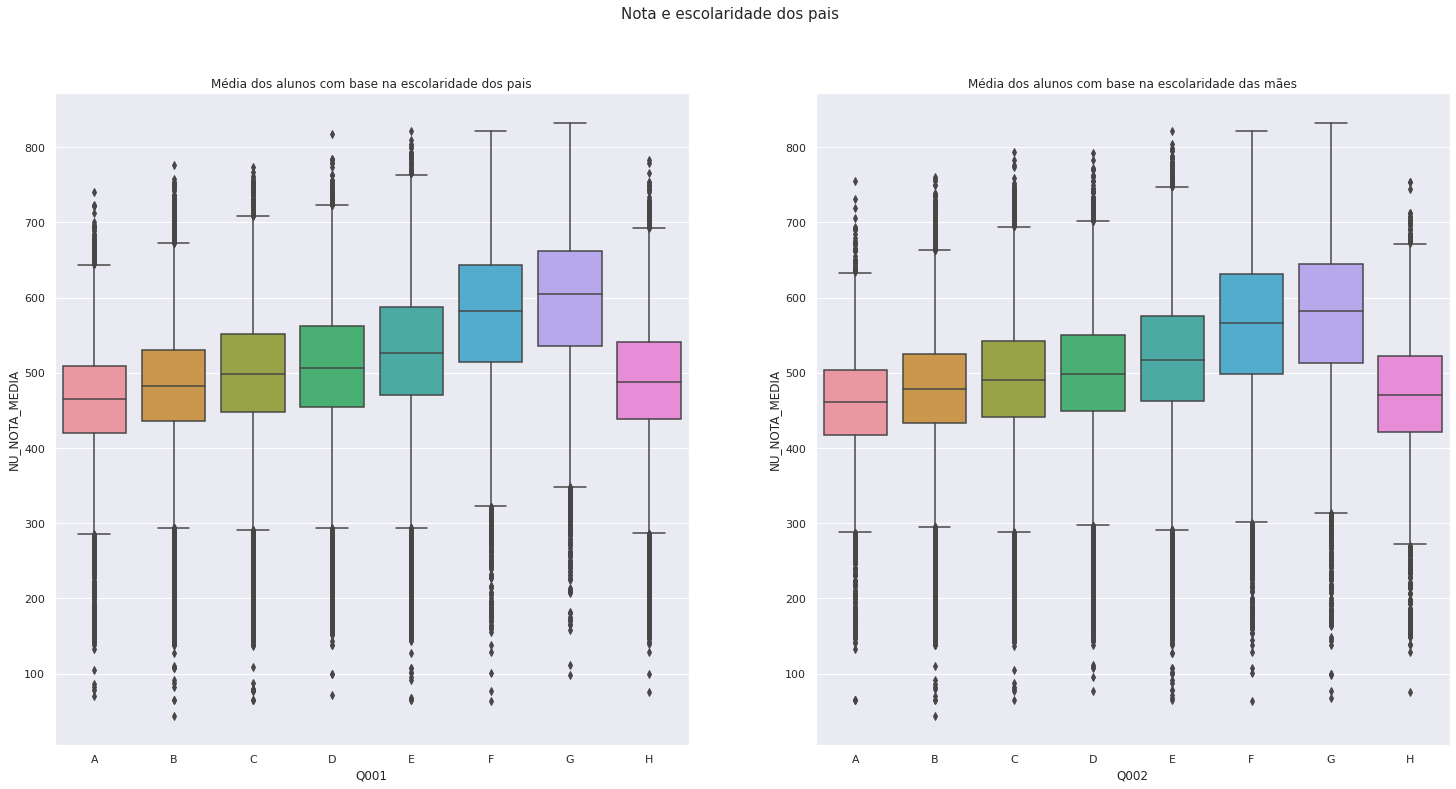

In [24]:
mae_pai = dados['Q002'].unique()
mae_pai.sort()

fig, axes = plt.subplots(1, 2)

sns.boxplot(ax= axes[0], x='Q001', y='NU_NOTA_MEDIA', data= nota_sem_zero, order = mae_pai)
axes[0].set_title('Média dos alunos com base na escolaridade dos pais', fontsize= 12)

sns.boxplot(ax= axes[1], x='Q002', y='NU_NOTA_MEDIA', data= nota_sem_zero, order = mae_pai)
axes[1].set_title('Média dos alunos com base na escolaridade das mães', fontsize= 12)

fig.suptitle('Nota e escolaridade dos pais', fontsize= 15)

Analisamos os inscritos e a escolaridade dos pais e tentamos entender se existe uma correlação entre seu nível de escolaridade e sua nota. Percebemos que a correlação é verdadeira nos dois casos, enquanto aumenta a escolaridade dos pais, aumentam o desempenho dos alunos.

A possível titulo de curiosidade, quando sobrepomos o desempenhos dos alunos com a escolaridade dos pais, vêmos que o gráfico dos pais está levemente acima no desempenho dos alunos.

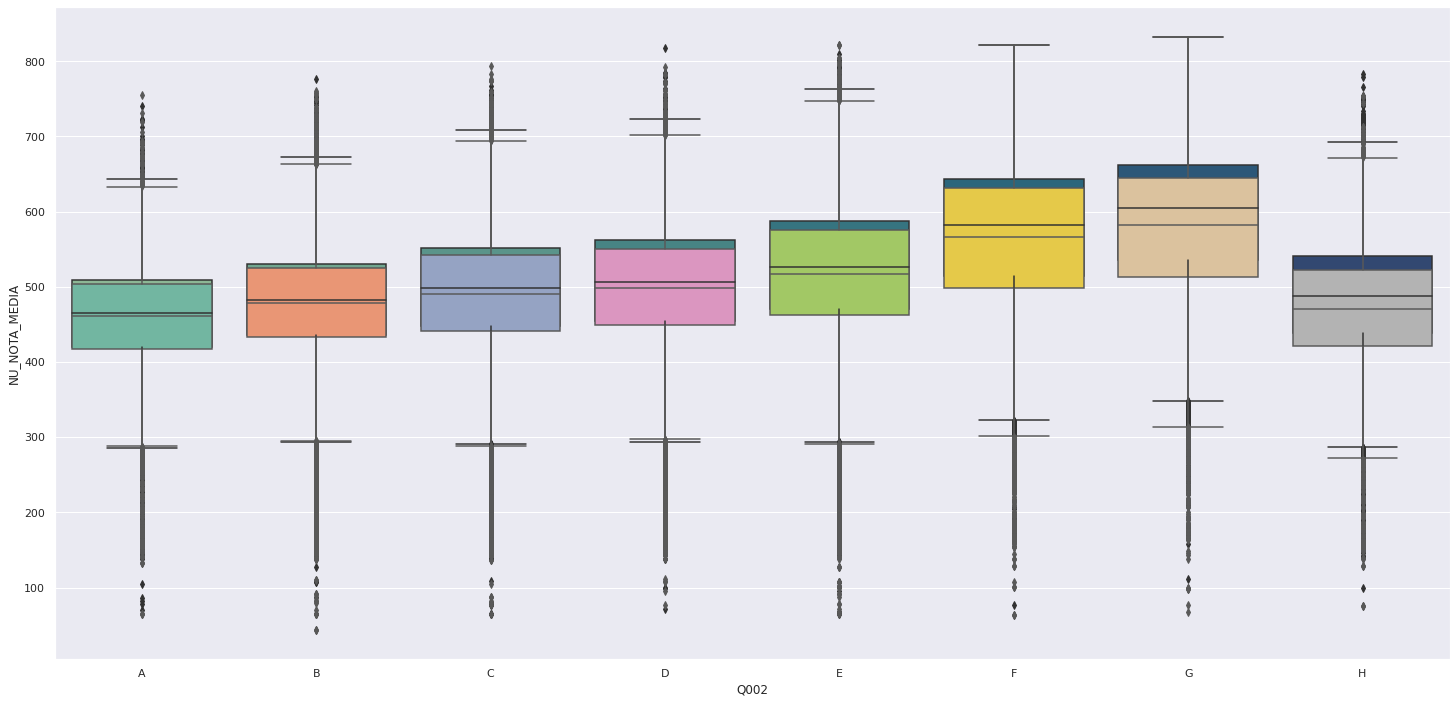

In [120]:
sns.boxplot(x='Q001', y='NU_NOTA_MEDIA', data= nota_sem_zero, order = mae_pai, palette='crest')
sns.boxplot(x='Q002', y='NU_NOTA_MEDIA', data= nota_sem_zero, order = mae_pai, palette='Set2')

Quando uma pessoa se inscreve para o **ENEM** ela pode optar por duas opções, realizar o exame como treineiro (menores de 18 anos e que não concluiram o ensimo médio), opção onde sua nota não entra em disputa de ***SISU***, vagas, faculdades, etc. Ou então se inscrever normalmente e participar de toda a disputa que **ENEM** se propõe a fazer. A principal função de ser treineiro é realmente treinar seu desempenho com toda uma experiência real do exame como ele é, para posteriormente fazer o **ENEM** com mais familiaridade e, portanto, *tentar um desempenho superior* na próxima tentativa. Observando *a escolaridade dos pais existe uma correlação muito interessante*. Como explicado, os treineiros fazem uma prova igual a normal, mas que atua como teste, o que difere na próxima atuação é de que ali existirá um melhor aproveitamento, pois aquilo já foi treinado. 

In [134]:
dfDominio.query('IN_TREINEIRO == 0')['Q001_DESC'].value_counts(normalize= True) * 100

Completou o Ensino Médio, mas não completou a Faculdade.                                   25.179721
Não completou a 4ª série/5º ano do Ensino Fundamental.                                     23.756240
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.    14.255351
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.       11.583422
Não sei.                                                                                    8.966860
Completou a Faculdade, mas não completou a Pós-graduação.                                   6.461926
Nunca estudou.                                                                              6.203842
Completou a Pós-graduação.                                                                  3.592638
Name: Q001_DESC, dtype: float64

In [135]:
dfDominio.query('IN_TREINEIRO == 0')['Q002_DESC'].value_counts(normalize= True) * 100

Completou o Ensino Médio, mas não completou a Faculdade.                                   31.546986
Não completou a 4ª série/5º ano do Ensino Fundamental.                                     18.148046
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.    14.084784
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.       13.411443
Completou a Faculdade, mas não completou a Pós-graduação.                                   9.037409
Completou a Pós-graduação.                                                                  6.609275
Nunca estudou.                                                                              4.159709
Não sei.                                                                                    3.002349
Name: Q002_DESC, dtype: float64

In [136]:
dfDominio.query('IN_TREINEIRO == 1')['Q001_DESC'].value_counts(normalize= True) * 100

Completou o Ensino Médio, mas não completou a Faculdade.                                   30.920070
Completou a Faculdade, mas não completou a Pós-graduação.                                  14.161418
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.    11.869359
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.       11.687553
Não completou a 4ª série/5º ano do Ensino Fundamental.                                     11.609636
Completou a Pós-graduação.                                                                 11.161613
Não sei.                                                                                    6.239855
Nunca estudou.                                                                              2.350497
Name: Q001_DESC, dtype: float64

In [137]:
dfDominio.query('IN_TREINEIRO == 1')['Q002_DESC'].value_counts(normalize= True) * 100

Completou o Ensino Médio, mas não completou a Faculdade.                                   35.595091
Completou a Faculdade, mas não completou a Pós-graduação.                                  17.407961
Completou a Pós-graduação.                                                                 17.148237
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.       11.109668
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.     8.759171
Não completou a 4ª série/5º ano do Ensino Fundamental.                                      6.856698
Não sei.                                                                                    1.973898
Nunca estudou.                                                                              1.149276
Name: Q002_DESC, dtype: float64

E este tipo de participante é muito presente entre os pais e mães que completaram o **Ensino Médio**, coisa que *acontece em todo o dataset*, pois a grande maioria é de pais que completaram o **Ensino Médio**, mas o que a gente vê é que, os pais com mais escolaridade recomendam mais os seus filhos a fazerem o treineiro. Pois **17.40% das mães** e **14.16% dos pais** com **Faculdade** aplicam seus filhos ao treino, e isso se repete aos **17.14% das mães** e **11.16% dos pais** com **Pós-graduação**, enquanto mais escolarizados, mais seus filhos rendem.

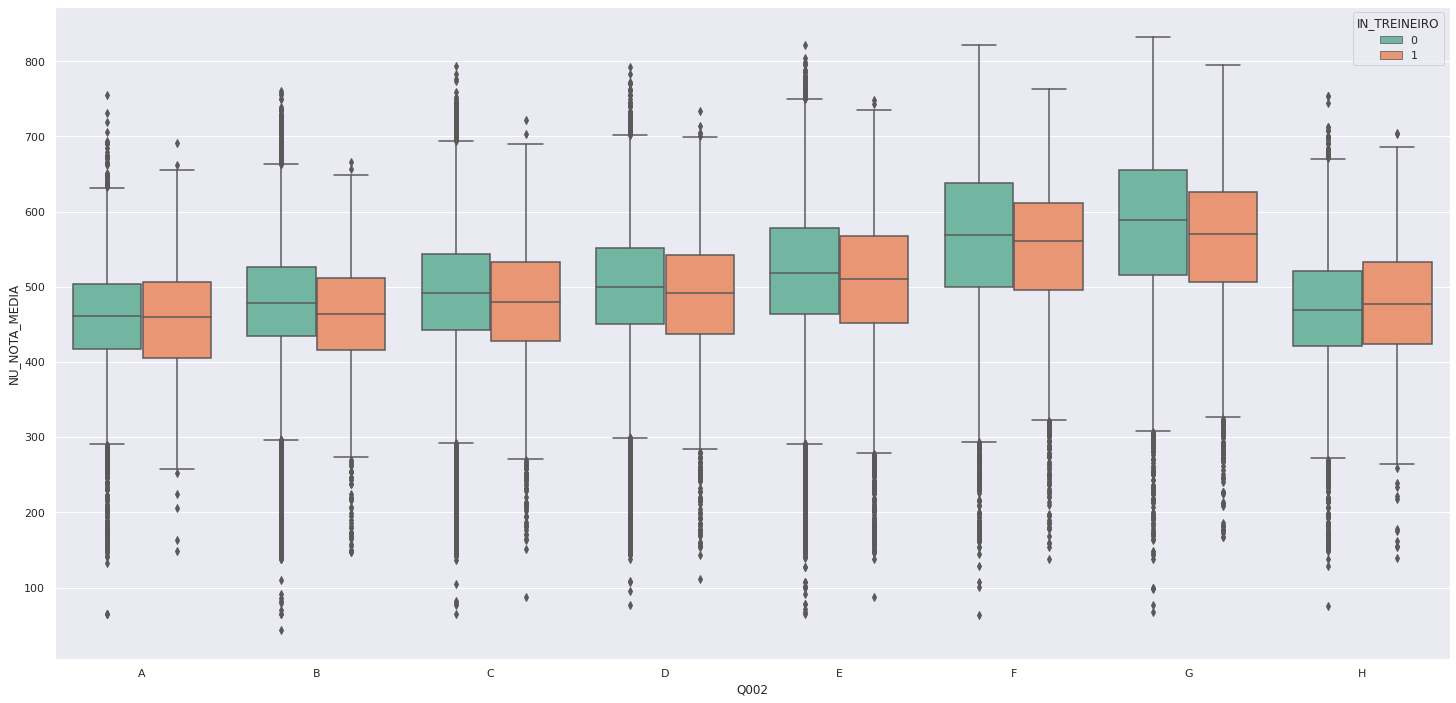

In [113]:
sns.boxplot( x='Q002', y='NU_NOTA_MEDIA', data= nota_sem_zero, hue='IN_TREINEIRO', palette='Set2', order = mae_pai)

# *Notas homens e mulheres autistas e não autistas*

Text(0.5, 1.0, 'Média de notas de pessoas com/sem Transtorno do Espectro Autista')

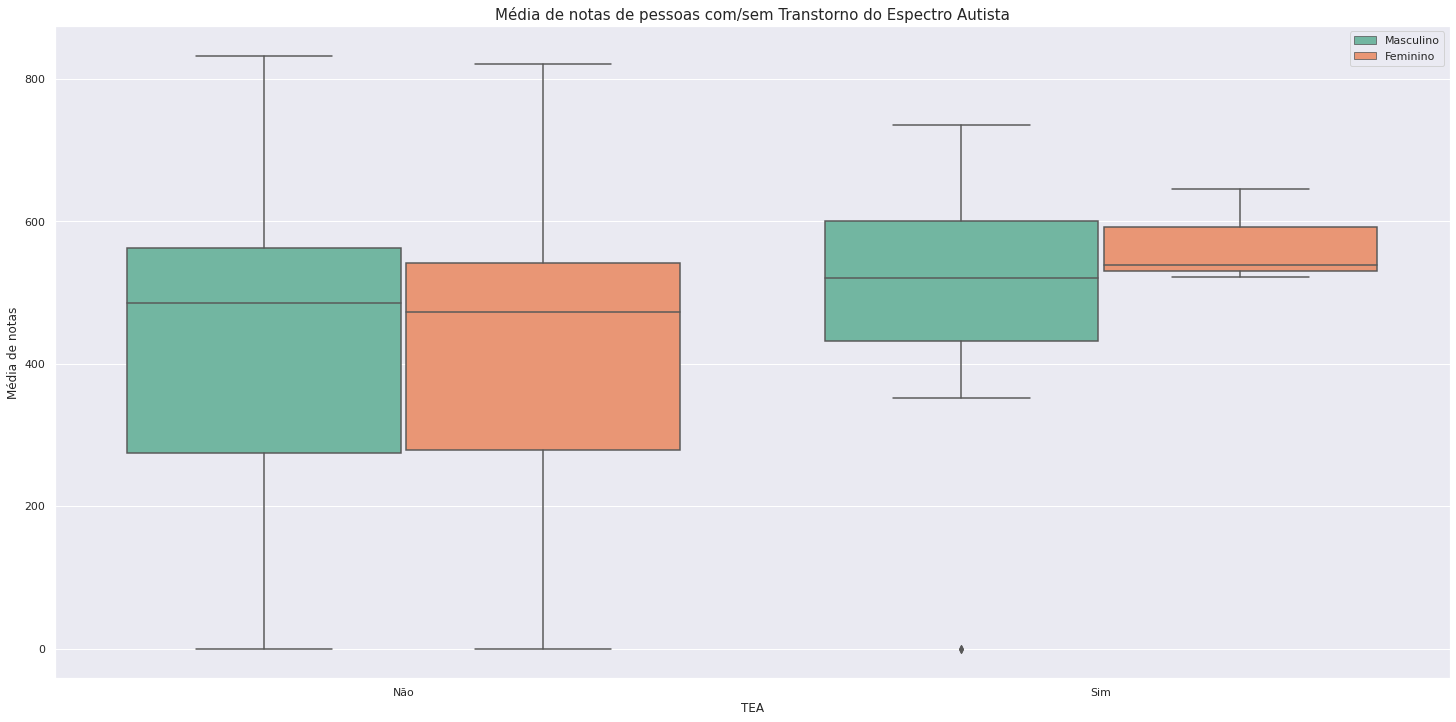

In [26]:
dados['TXT_AUTISMO']=pd.cut(
   dados['IN_AUTISMO'],
   bins=[-1, 0, 1],
   labels=['Não', 'Sim']
)

sns.boxplot(x='TXT_AUTISMO', y='NU_NOTA_MEDIA', data= dados, hue='TP_SEXO', palette='Set2')

L=plt.legend()

L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')

plt.xlabel('TEA', fontsize= 12)
plt.ylabel('Média de notas', fontsize= 12)
plt.title('Média de notas de pessoas com/sem Transtorno do Espectro Autista', fontsize= 15)

In [27]:
dados.query('IN_AUTISMO == 0')['NU_NOTA_MEDIA'].describe()

count    127351.000000
mean        392.044353
std         231.309024
min           0.000000
25%         277.740000
50%         477.080000
75%         550.820000
max         832.820000
Name: NU_NOTA_MEDIA, dtype: float64

In [28]:
dados.query('IN_AUTISMO == 1')['NU_NOTA_MEDIA'].describe()

count     29.000000
mean     501.232414
std      167.563936
min        0.000000
25%      470.260000
50%      529.520000
75%      600.620000
max      735.640000
Name: NU_NOTA_MEDIA, dtype: float64

Realizamos o gráfico entre inscritos que disseram ter o **Transtorno do Espectro Autista *(TEA)***, e seu desempenho é consideravelmente superior a média dos que não tem o transtorno. O que denota a expectativa de que, normalmente, autistas tendem a ter foco superior em atividades e, como explicita o gráfico o desempenho deles é superior.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Média de notas de pessoas com/sem Transtorno do Espectro Autista')

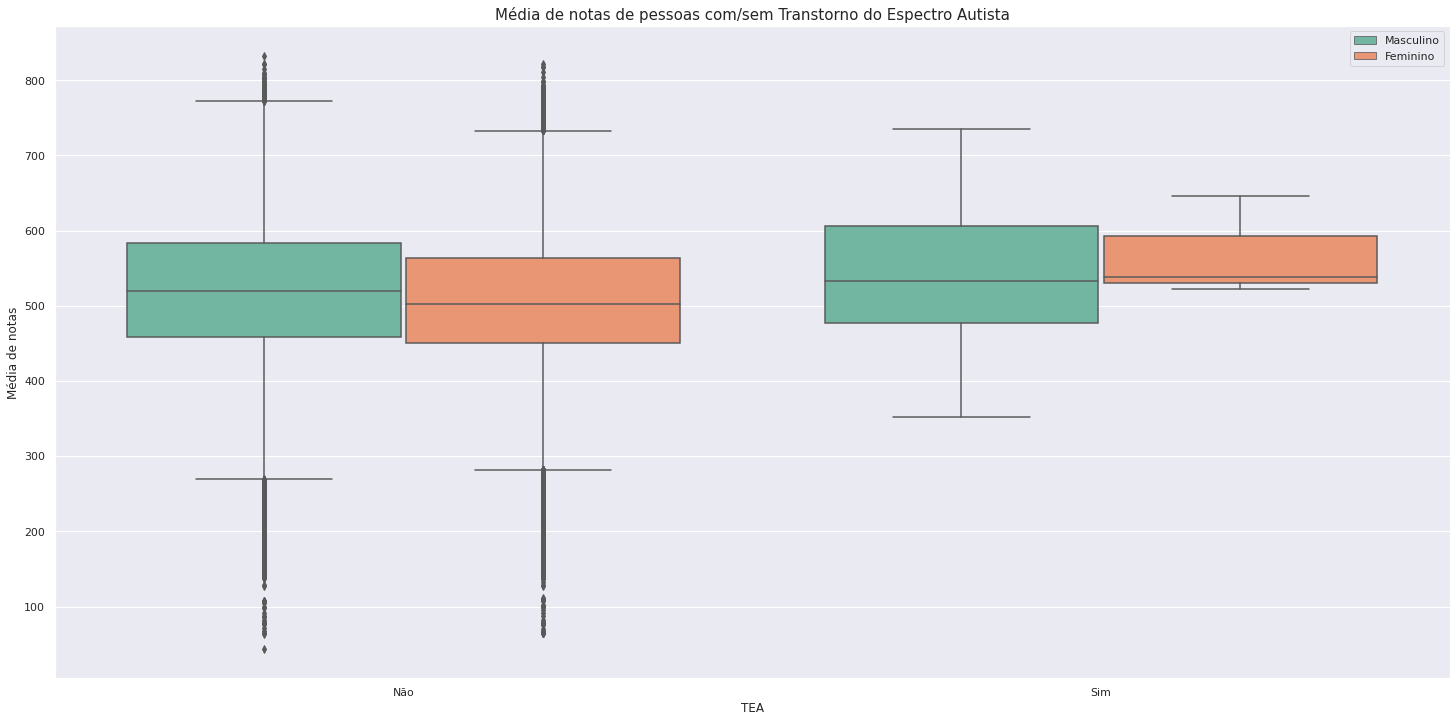

In [29]:
nota_sem_zero['TXT_AUTISMO']=pd.cut(
   nota_sem_zero['IN_AUTISMO'],
   bins=[-1, 0, 1],
   labels=['Não', 'Sim']
)

sns.boxplot(x='TXT_AUTISMO', y='NU_NOTA_MEDIA', data= nota_sem_zero, hue='TP_SEXO', palette='Set2')

L=plt.legend()

L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')

plt.xlabel('TEA', fontsize= 12)
plt.ylabel('Média de notas', fontsize= 12)
plt.title('Média de notas de pessoas com/sem Transtorno do Espectro Autista', fontsize= 15)

In [30]:
nota_sem_zero.query('IN_AUTISMO == 0')['NU_NOTA_MEDIA'].describe()

count    98191.000000
mean       508.470638
std        100.961565
min         44.000000
25%        453.460000
50%        509.040000
75%        572.300000
max        832.820000
Name: NU_NOTA_MEDIA, dtype: float64

In [31]:
nota_sem_zero.query('IN_AUTISMO == 1')['NU_NOTA_MEDIA'].describe()

count     27.000000
mean     538.360741
std       97.366700
min      351.620000
25%      483.940000
50%      536.880000
75%      610.970000
max      735.640000
Name: NU_NOTA_MEDIA, dtype: float64

Filtrando as notas zeros e alunos faltantes o quartil demonstra desempenho melhor em ambos os campos, e mantém a disparidade entre os autistas e não autistas, mantendo a média deles entre ***483.94*** e ***610.97***, com máxima de ***735.64***. Muito superior as médias vistas de ***453.46*** e ***572.30***, com máxima de ***835.82***. (Em ambas as análises de média não foram discriminadas o sexo, sendo portanto, média geral por transtorno ou não.)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Text(0.5, 0.98, 'Média de notas de pessoas com/sem Transtorno do Espectro Autista')

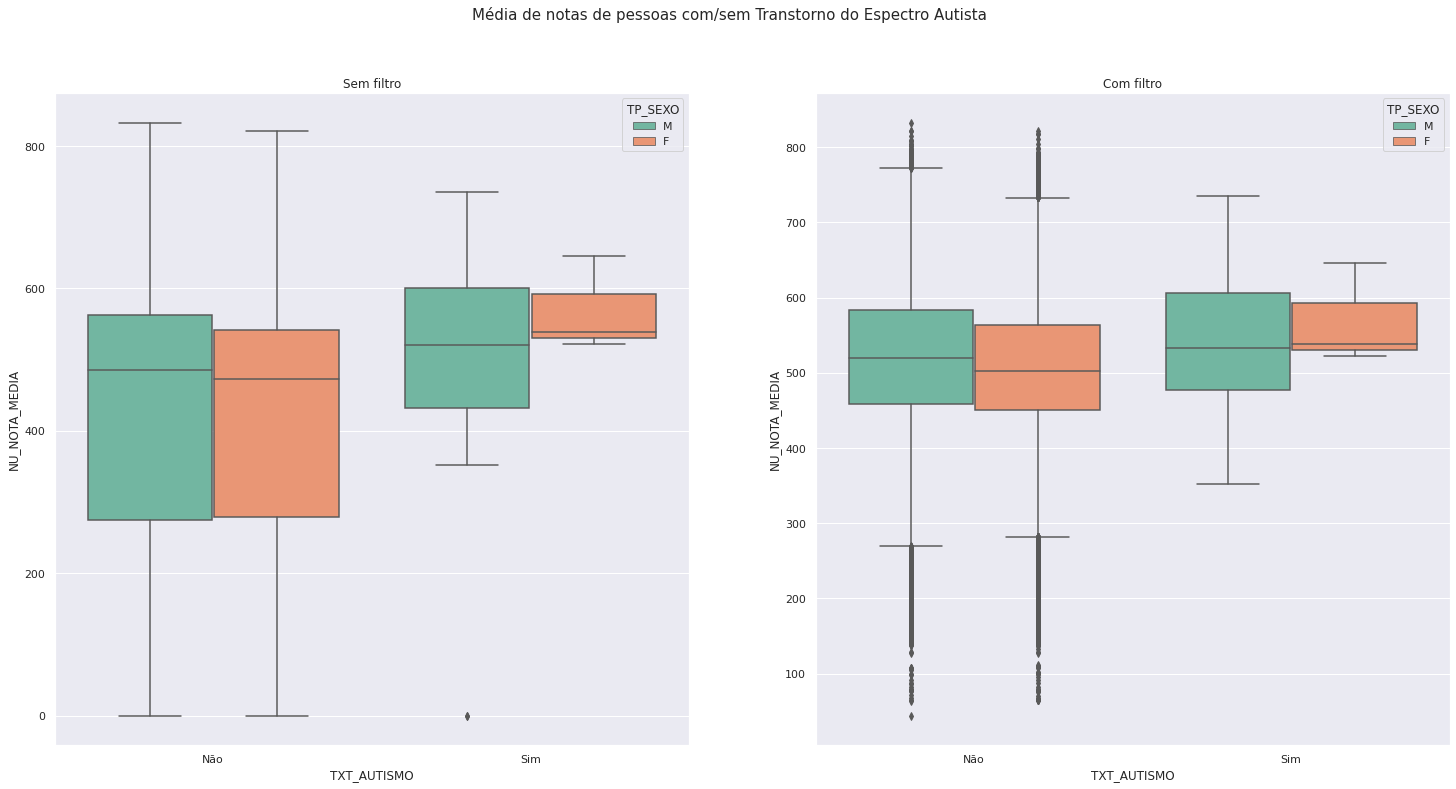

In [32]:
fig, axes = plt.subplots(1, 2)

dados['TXT_AUTISMO']=pd.cut(
   dados['IN_AUTISMO'],
   bins=[-1, 0, 1],
   labels=['Não', 'Sim']
)

nota_sem_zero['TXT_AUTISMO']=pd.cut(
   nota_sem_zero['IN_AUTISMO'],
   bins=[-1, 0, 1],
   labels=['Não', 'Sim']
)


sns.boxplot(ax=axes[0], x='TXT_AUTISMO', y='NU_NOTA_MEDIA', data= dados, hue='TP_SEXO', palette='Set2')

sns.boxplot(ax=axes[1], x='TXT_AUTISMO', y='NU_NOTA_MEDIA', data= nota_sem_zero, hue='TP_SEXO', palette='Set2')

axes[1].set_title('Com filtro')
axes[0].set_title('Sem filtro')

fig.suptitle('Média de notas de pessoas com/sem Transtorno do Espectro Autista', fontsize= 15)

*   A diferença com os faltantes com o TEA é de ***470.26 a 600.62*** | e de não faltantes com o TEA ***483.94 a 610.97*** com máxima de **737.22**.

*   A diferença com os faltantes sem o TEA é de ***277.74 e 550.82*** | e de não faltantes sem o transtorno é de ***453.46 a 572.30***, com máxima de **832.82**.

# *Notas homens e mulheres dislexos e não dislexos*

Text(0.5, 1.0, 'Média de notas de pessoas com/sem dislexia')

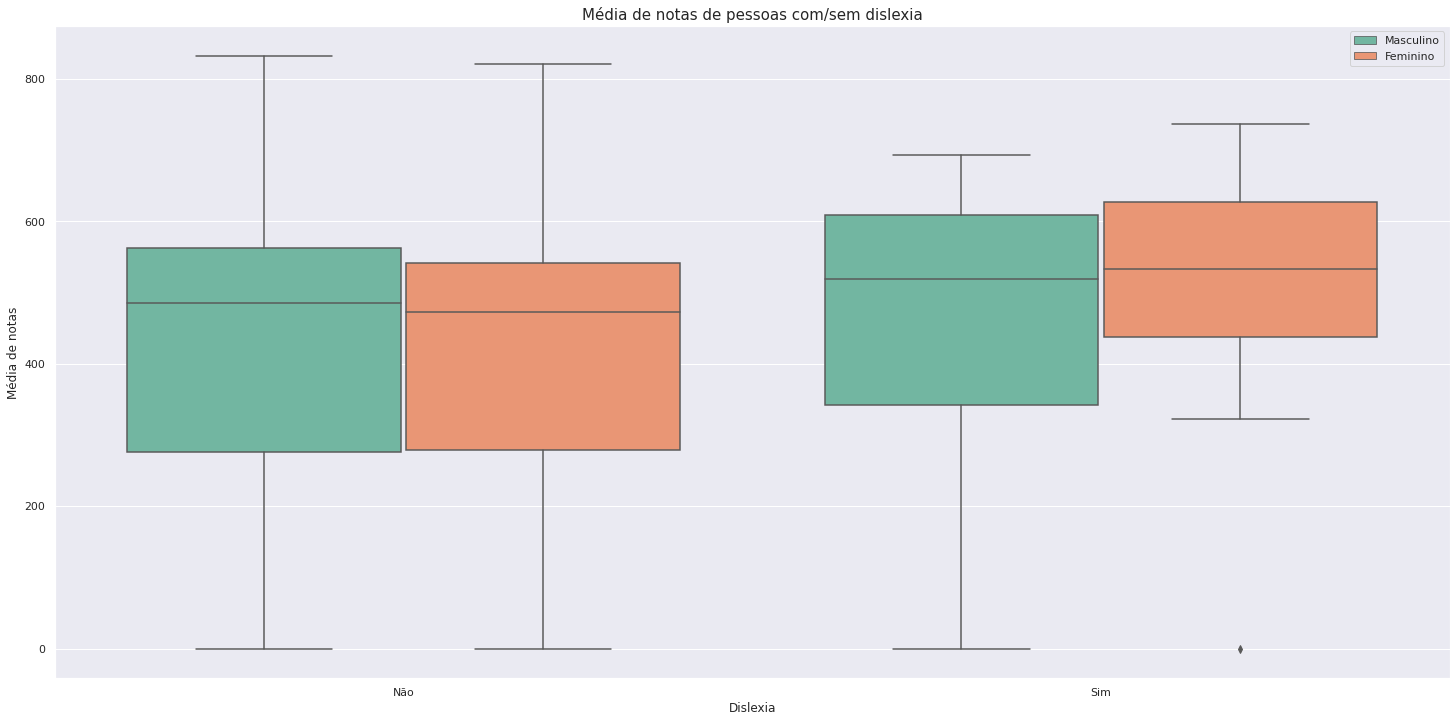

In [33]:
dados['TXT_DISLEXIA']=pd.cut(
   dados['IN_DISLEXIA'],
   bins=[-1, 0, 1],
   labels=['Não', 'Sim']
)

sns.boxplot(x='TXT_DISLEXIA', y='NU_NOTA_MEDIA', data= dados, hue='TP_SEXO', palette='Set2')

L=plt.legend()

L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')

plt.xlabel('Dislexia', fontsize= 12)
plt.ylabel('Média de notas', fontsize= 12)
plt.title('Média de notas de pessoas com/sem dislexia', fontsize= 15)

Realizando a filtragem de faltantes ou notas zeros ainda sim a média dos disléxos é superior e seu quartil mantém bom desempenho. A dislexia pode afetar o foco, concentração e os estudos. Seu desempenho se diferencia dos estudantes com bom desempenho acadêmico, com base em: [acesso no link](https://www.scielo.br/pdf/jsbf/v23n2/v23n2a10.pdf)

In [34]:
dados.query('IN_DISLEXIA == 0')['NU_NOTA_MEDIA'].describe()

count    127335.000000
mean        392.039983
std         231.307308
min           0.000000
25%         277.730000
50%         477.080000
75%         550.800000
max         832.820000
Name: NU_NOTA_MEDIA, dtype: float64

In [35]:
dados.query('IN_DISLEXIA == 1')['NU_NOTA_MEDIA'].describe()

count     45.000000
mean     474.776444
std      201.190669
min        0.000000
25%      401.560000
50%      523.600000
75%      618.280000
max      737.220000
Name: NU_NOTA_MEDIA, dtype: float64

A perspectiva que têmos dos participantes com dislexia é parecida com o que acontece com os inscritos com TEA, se analisarmos o desempenho dos dislexos vemos a média de ***401.52*** e ***618.28***, com máxima de ***737.22***. Sendo o desempenho de não dislexos entre 277.73 e 550.80, com máxima de ***832.82***. (Em ambas as análises de média não foram discriminadas o sexo, sendo portanto, média geral por déficit ou não.)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Média de notas de pessoas com/sem dislexia (sem faltantes ou notas zero)')

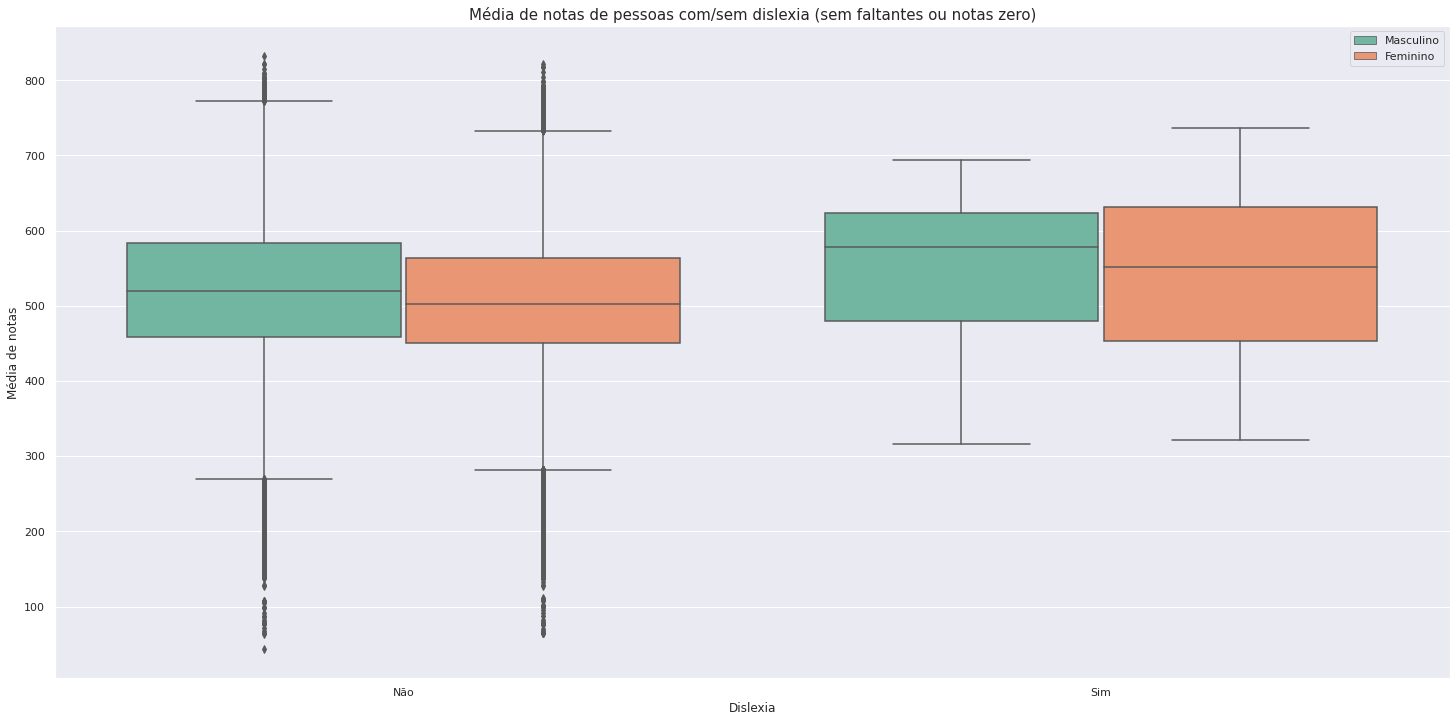

In [36]:
nota_sem_zero['TXT_DISLEXIA']=pd.cut(
   nota_sem_zero['IN_DISLEXIA'],
   bins=[-1, 0, 1],
   labels=['Não', 'Sim']
)

sns.boxplot(x='TXT_DISLEXIA', y='NU_NOTA_MEDIA', data= nota_sem_zero, hue='TP_SEXO', palette='Set2')

L=plt.legend()

L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')

plt.xlabel('Dislexia', fontsize= 12)
plt.ylabel('Média de notas', fontsize= 12)
plt.title('Média de notas de pessoas com/sem dislexia (sem faltantes ou notas zero)', fontsize= 15)

In [37]:
nota_sem_zero.query('IN_DISLEXIA == 0')['NU_NOTA_MEDIA'].describe()

count    98178.000000
mean       508.468407
std        100.954691
min         44.000000
25%        453.460000
50%        509.040000
75%        572.295000
max        832.820000
Name: NU_NOTA_MEDIA, dtype: float64

In [38]:
nota_sem_zero.query('IN_DISLEXIA == 1')['NU_NOTA_MEDIA'].describe()

count     40.000000
mean     534.123500
std      114.698252
min      316.500000
25%      455.670000
50%      564.470000
75%      627.695000
max      737.220000
Name: NU_NOTA_MEDIA, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Text(0.5, 0.98, 'Média de notas de pessoas com/sem dislexia')

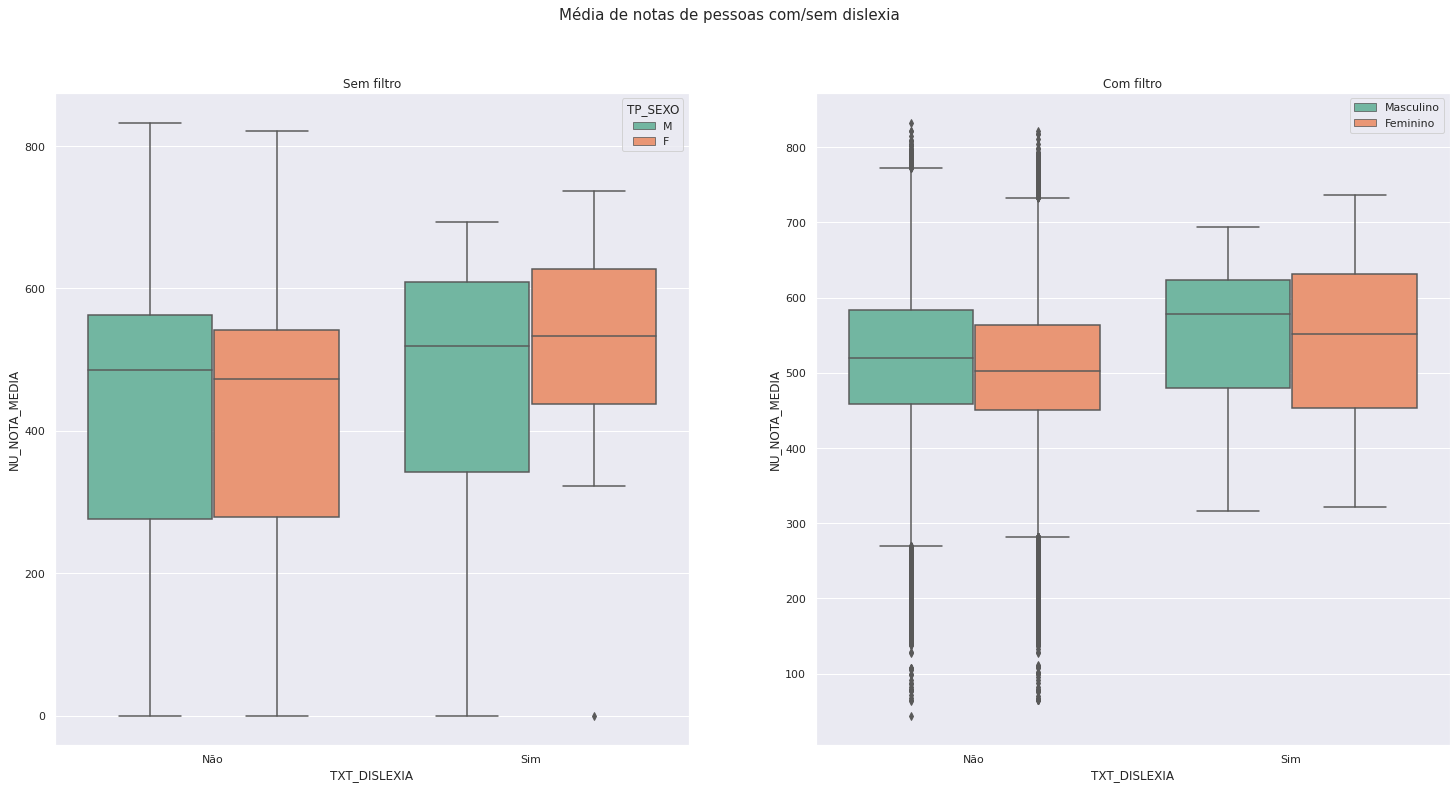

In [39]:
fig, axes = plt.subplots(1, 2)

dados['TXT_DISLEXIA']=pd.cut(
   dados['IN_DISLEXIA'],
   bins=[-1, 0, 1],
   labels=['Não', 'Sim']
)

nota_sem_zero['TXT_DISLEXIA']=pd.cut(
   nota_sem_zero['IN_DISLEXIA'],
   bins=[-1, 0, 1],
   labels=['Não', 'Sim']
)

sns.boxplot(ax=axes[0],x='TXT_DISLEXIA', y='NU_NOTA_MEDIA', data= dados, hue='TP_SEXO', palette='Set2')

sns.boxplot(ax=axes[1],x='TXT_DISLEXIA', y='NU_NOTA_MEDIA', data= nota_sem_zero, hue='TP_SEXO', palette='Set2')

L=plt.legend()

L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')

axes[1].set_title('Com filtro')
axes[0].set_title('Sem filtro')

fig.suptitle('Média de notas de pessoas com/sem dislexia', fontsize= 15)


*   A diferença com os faltantes dislexos é de ***401.52 a 618.28*** | e não faltantes disléxicos é de ***455.67 a 627.69*** com máxima de **737.22**.

*   A diferença com os faltantes não dislexos é de ***277.73 e 550.80*** | e não faltantes não disléxicos é de ***453.46 a 572.29***, com máxima de **832.82**.




# *Média dos participantes com acesso a internet*

Text(0.5, 0, 'Acesso a Internet (B: SIM | A: NÃO)')

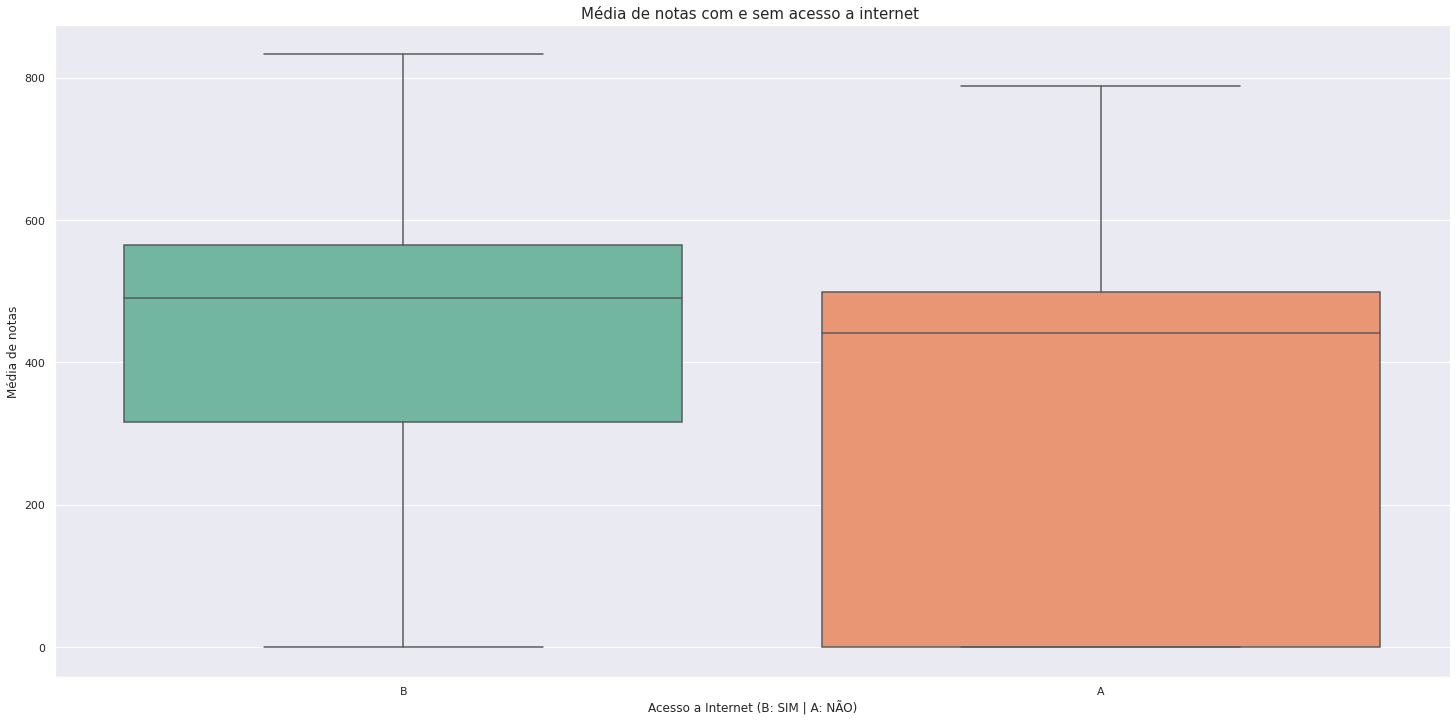

In [40]:
sns.boxplot(x='Q025', y='NU_NOTA_MEDIA', data= dados, palette='Set2')

plt.title('Média de notas com e sem acesso a internet ', fontsize= 15)
plt.ylabel("Média de notas", fontsize= 12)
plt.xlabel("Acesso a Internet (B: SIM | A: NÃO)", fontsize= 12)

In [41]:
dados['Q025'].value_counts()

B    98793
A    28587
Name: Q025, dtype: int64

A maioria dos inscritos têm acesso a internet (***98.793***), o desempenho de quem têm acesso a internet é superior de quem não têm, pode parecer óbvio, já que a internet é atualmente um dos principais, se não o principal recurso de estudos e conhecimento atualmente. O consumo de contéudos e conhecimento de graça, como a internet, é de fato, um passo a frente. Mas este gráfico destoa um fato curioso, o quartil está entre 0 e um pouco mais de 500. Mas por que? Lendo os participantes e verificando a disponibilidade deles no dia do exame, se prova que o que puxa o quartil para baixo é que, quem não têm acesso a internet falta com mais frequência do que quem têm o acesso. 

In [42]:
nota_sem_zero['Q025'].value_counts()

B    77249
A    20969
Name: Q025, dtype: int64

Enquanto existem, presente no exame 77 mil estudantes com internet, a realidade oposta é muito inferior, com quase 21 mil estudades sem o acesso, que além de terem faltado, o que abaixa a mínima do quartil, a desproporção entre as duas é muito maior, tanto em quantidade de participantes e em média de notas.

Text(0.5, 0.98, 'Média de notas com e sem acesso a internet ')

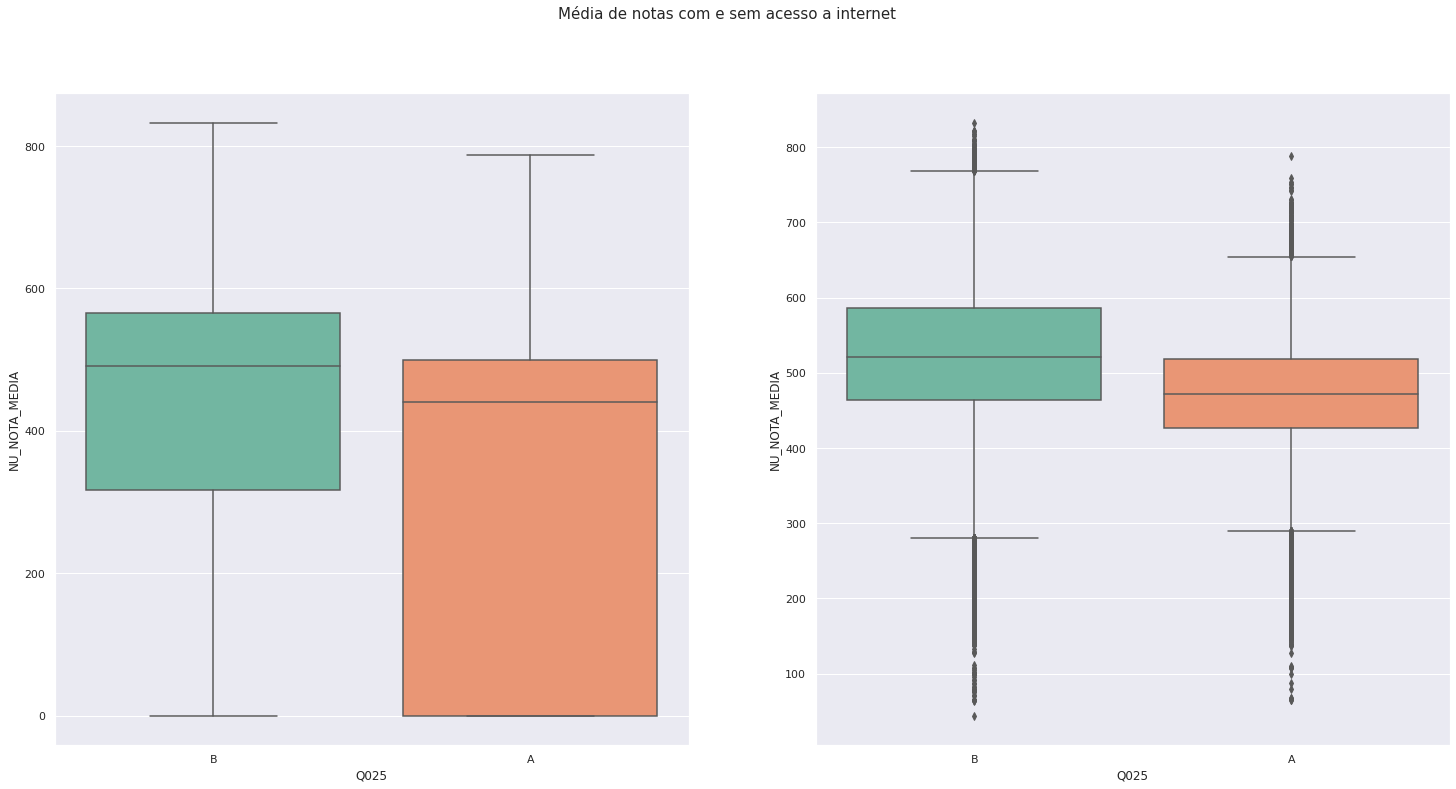

In [43]:
fig, axes = plt.subplots(1, 2)

sns.boxplot(ax=axes[0],x='Q025', y='NU_NOTA_MEDIA', data= dados, palette='Set2')

sns.boxplot(ax=axes[1],x='Q025', y='NU_NOTA_MEDIA', data= nota_sem_zero, palette='Set2')

fig.suptitle('Média de notas com e sem acesso a internet ', fontsize= 15)

# Média dos alunos entre escolas não declaradas, públicas, privadas e do exterior

Text(0.5, 1.0, 'Média de notas por sexo com base no tipo de escolas')

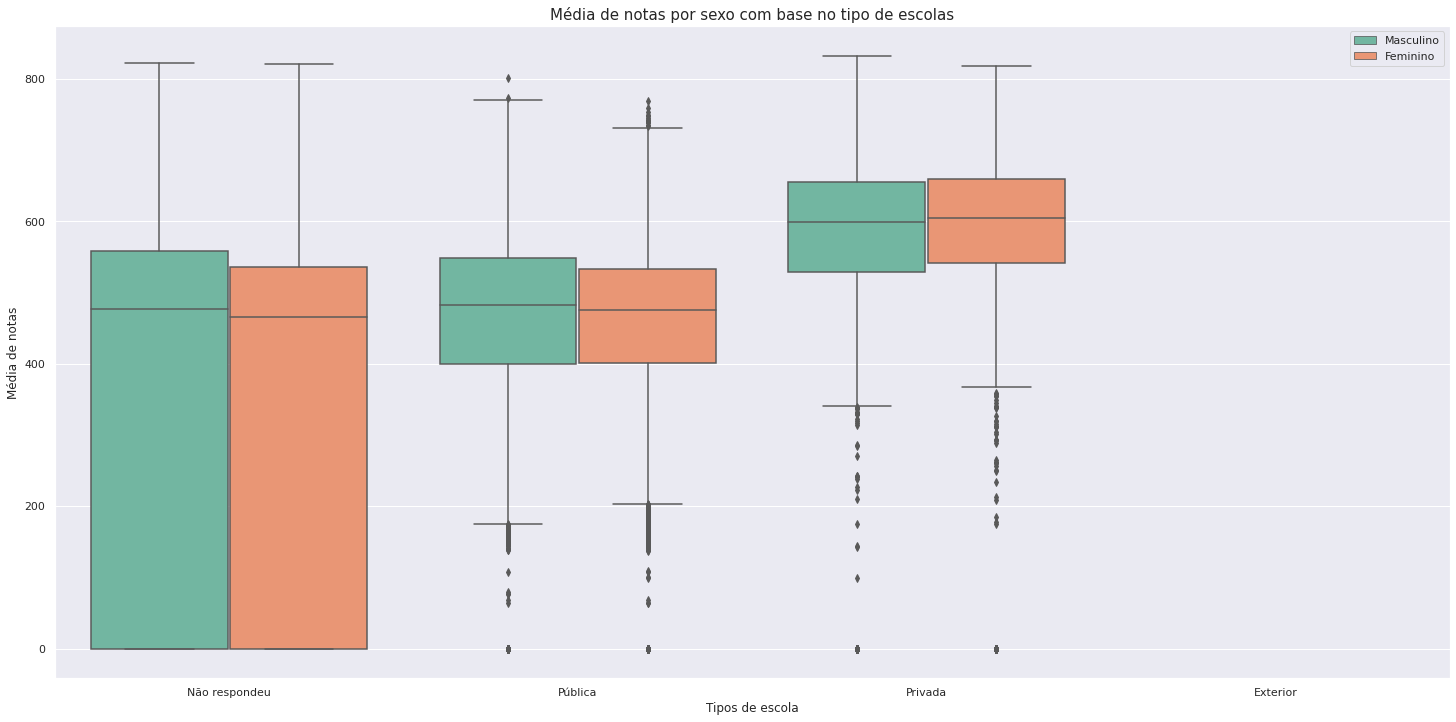

In [187]:
dados['TXT_ESCOLA']=pd.cut(
   dados['TP_ESCOLA'],
   bins=[0, 1, 2, 3, 4],
   labels=['Não respondeu', 'Pública', 'Privada', 'Exterior']
)

sns.boxplot(x='TXT_ESCOLA', y='NU_NOTA_MEDIA', data= dados, palette='Set2', hue='TP_SEXO')

L = plt.legend()
L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')

plt.ylabel("Média de notas")
plt.xlabel("Tipos de escola")
plt.title('Média de notas por sexo com base no tipo de escolas', fontsize= 15)

A situação de alunos faltantes e com médias inferiores se repete em escolas consideradas de "*baixo nível*", os participantes que não respnderam qual era a o tipo de sua escola foram os que mais tiraram 0 ou faltaram, enquanto mantém, entretanto, uma mediana próxima das escolas públicas. A diferença se faz nas **escolas privadas**, onde ocorrem menos faltas e notas frequentemente mais altas que as outras. Na amostra não houveram alunos de escolas do exterior.

# Média de notas em diferentes administrações escolares



1.   O que a administração escolar pode nos dizer sobre desempenho?
2.   Qual melhor administração escolar?
3.   As mulheres superam os homens em alguma unidade?
4.   Por que, enquanto maioria, as mulheres detém notas inferiores?



Text(0.5, 1.0, 'Média de notas por sexo')

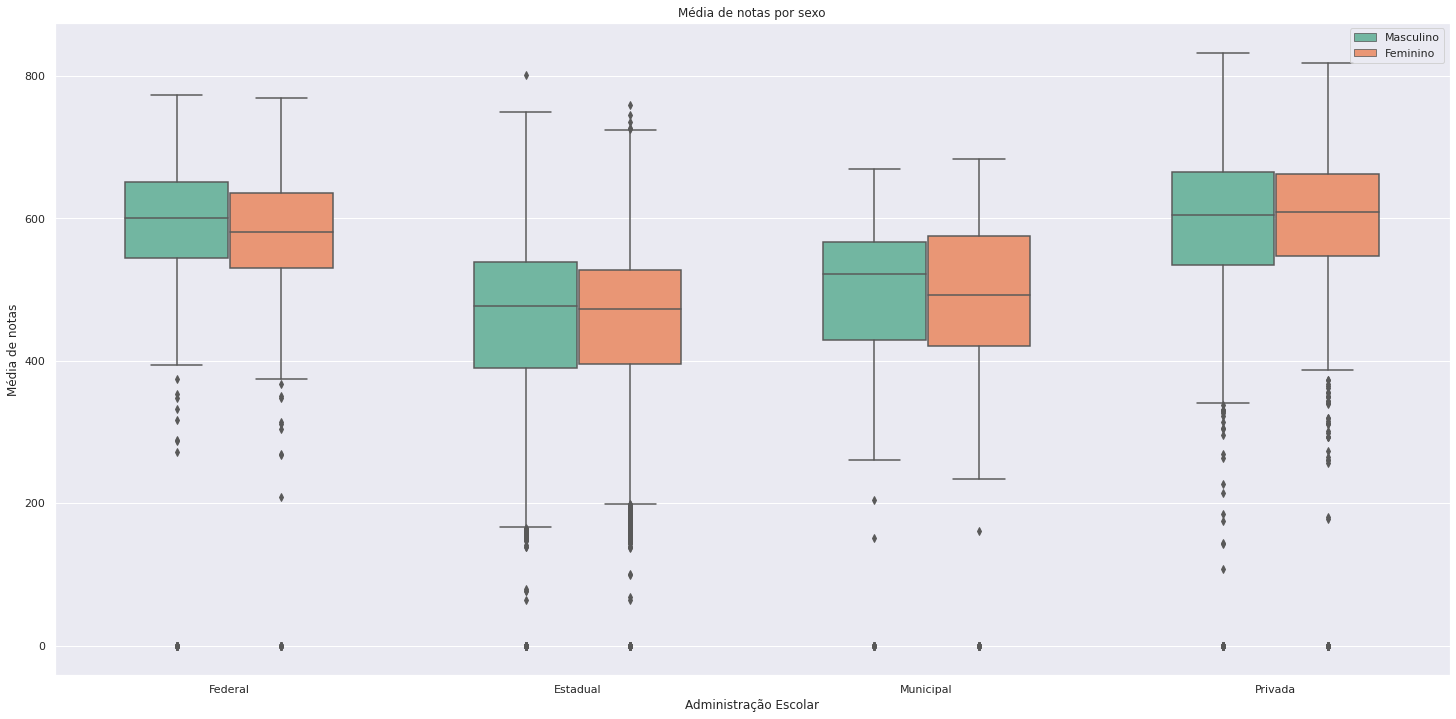

In [46]:
dados['TXT_DEPENDENCIA_ADM_ESC']=pd.cut(
   dados['TP_DEPENDENCIA_ADM_ESC'],
   bins=[0, 1, 2, 3, 4],
   labels=['Federal', 'Estadual', 'Municipal', 'Privada']
)

sns.boxplot(x='TXT_DEPENDENCIA_ADM_ESC', y='NU_NOTA_MEDIA', data= dados, palette='Set2', hue='TP_SEXO', width= 0.6)
L = plt.legend()

L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')
plt.ylabel("Média de notas")
plt.xlabel("Administração Escolar")
plt.title('Média de notas por sexo')

Separamos a posição da média dos participantes de cada tipo de administração escolar e seu desempenho contrastado por sexo. Mesmo com proporção inferior a das outras administrações, as escolas federais mantiveram desempenho superiro as escolas privadas, que ficaram logo atrás no quesito desempenho. As mulheres das escolas municipais obtiveram média superior que os homens, já nas escolas privadas pode ser considerada equidade no desempenho.

In [47]:
dados[['TP_DEPENDENCIA_ADM_ESC', 'TP_SEXO']].value_counts()

TP_DEPENDENCIA_ADM_ESC  TP_SEXO
2.0                     F          13598
                        M           9346
4.0                     F           2192
                        M           1992
1.0                     F            650
                        M            594
3.0                     F            135
                        M            120
dtype: int64

Em todos os tipos de dependência e adiministrações das escolas, as mulheres são maioria na nossa amostra. Entretanto, sua média em notas está normalmente abaixo, a não ser, exclusivamente nas escolas municipais, onde suas médias totais superam outras.

In [48]:
dados['TP_SEXO'].value_counts()

F    75883
M    51497
Name: TP_SEXO, dtype: int64

Text(0.5, 1.0, 'Notas por cor/raça e sexo')

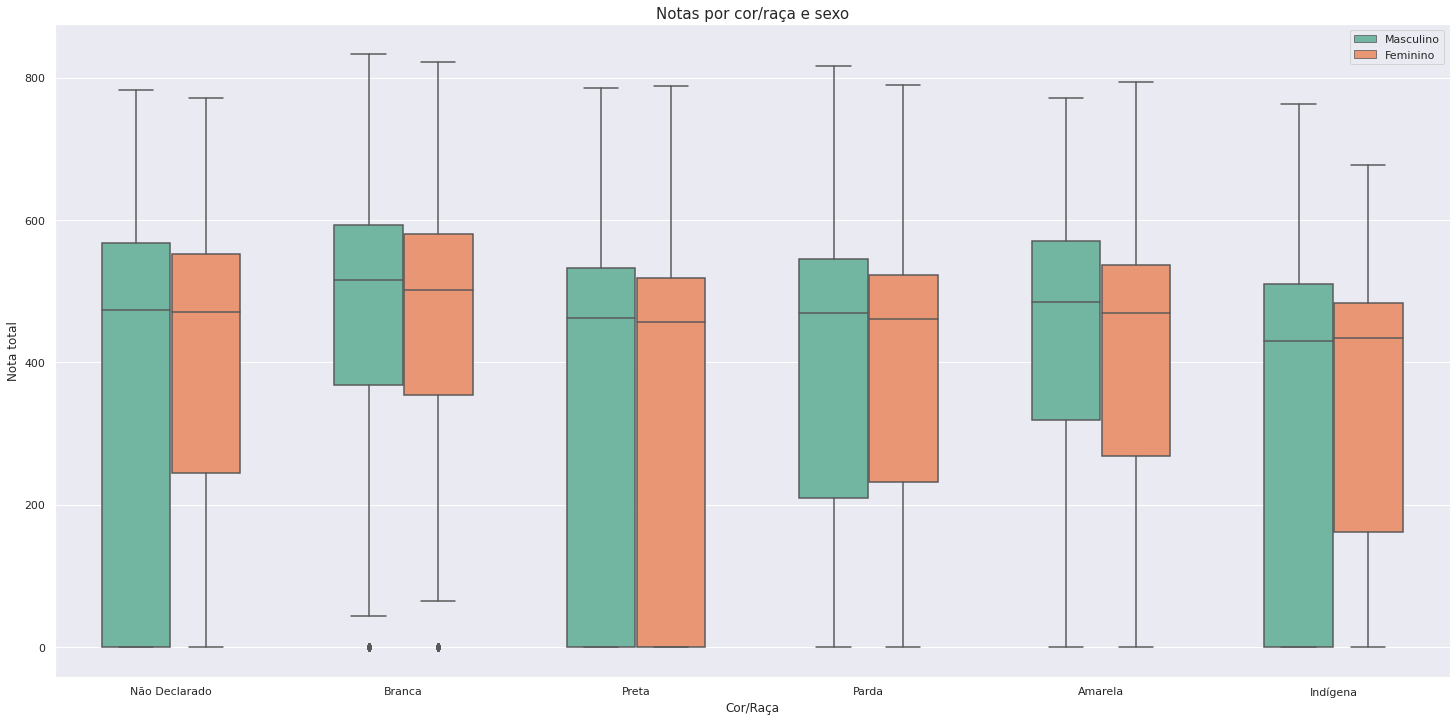

In [49]:
dados['TXT_COR_RACA']=pd.cut(
   dados['TP_COR_RACA'],
   bins=[-1, 0, 1, 2, 3, 4, 5],
   labels=['Não Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
)

sns.boxplot(x='TXT_COR_RACA', y='NU_NOTA_MEDIA', data= dados, palette='Set2', hue='TP_SEXO', width= 0.6)
L = plt.legend()

L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')
plt.ylabel("Nota total", fontsize= 12)
plt.xlabel("Cor/Raça", fontsize= 12)
plt.title('Notas por cor/raça e sexo', fontsize= 15)

A diferença entre cores e raça destoa, novamente a questão entre faltantes, notas baixas e fraco desempenho. Não declarados faltaram muito, por tanto tem baixo desempenho, pretos e pretas também, até os poucos indígenas presentas na amostra reforçaram a questão. A pergunta que me resta é, por que? Isso é natural, está correto ou a cor/raça realmente dizem algo sobre a realidade dos estudantes e participantes?

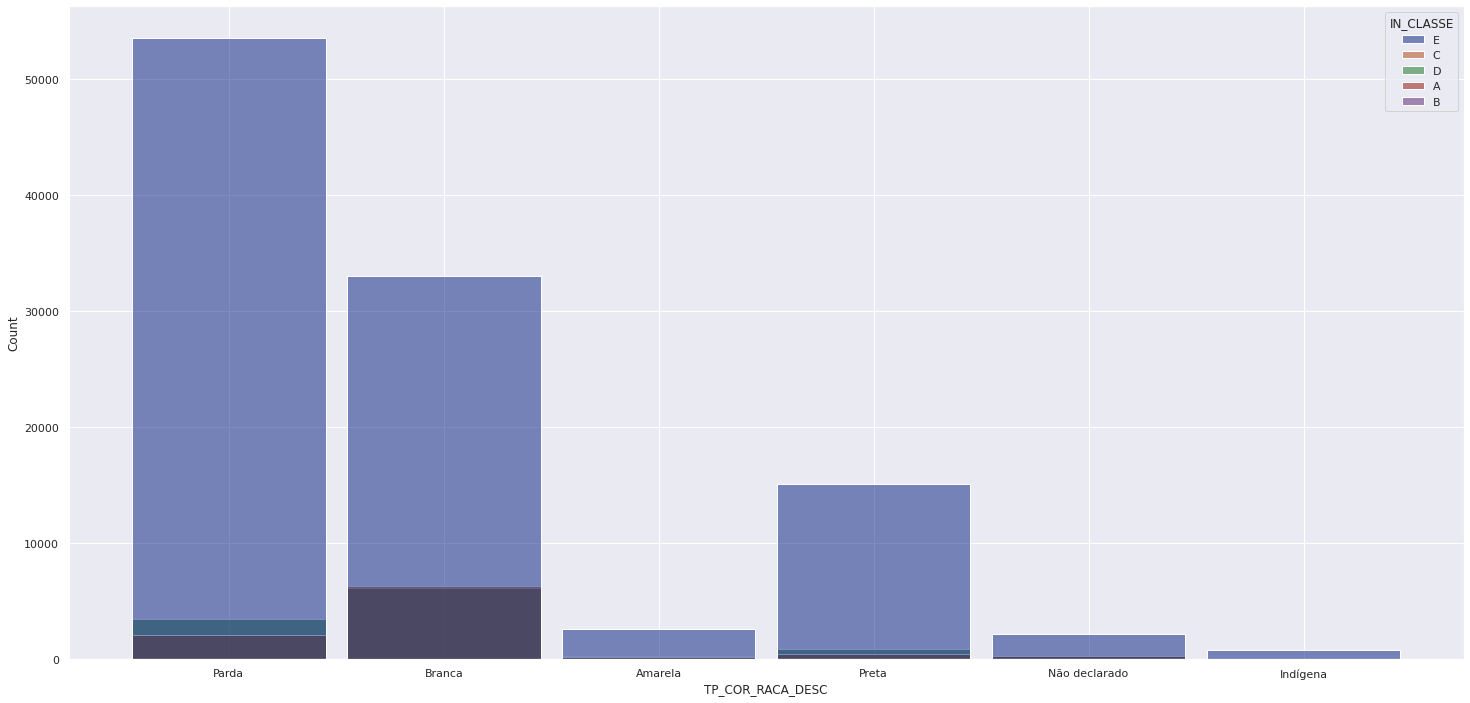

In [50]:
sns.histplot(x= 'TP_COR_RACA_DESC', data= dfDominio, palette='dark', hue='IN_CLASSE', fill= True, shrink= 0.9)

Decidi pegar cada participante e entender em qual classe social ele estava, entenda a sequência das classes econômicas na [FGV](https://cps.fgv.br/qual-faixa-de-renda-familiar-das-classes). A classe social E é a mais presente em todas as cores e etinias, sendo maior, respectivamente em pardos, brancos e pretos. No entanto, proporcionalmente a sequência é de pretos (***92.49%***), pardos (***90.61%***), brancos (***72.34%***)

In [51]:
dfDominio.query('TP_COR_RACA_DESC == "Parda"')['IN_CLASSE'].value_counts(normalize=True) * 100

E    90.615910
D     5.858080
C     3.441453
A     0.052425
B     0.032132
Name: IN_CLASSE, dtype: float64

In [52]:
dfDominio.query('TP_COR_RACA_DESC == "Preta"')['IN_CLASSE'].value_counts(normalize=True) * 100

E    92.490798
D     4.944785
C     2.453988
A     0.061350
B     0.049080
Name: IN_CLASSE, dtype: float64

In [53]:
dfDominio.query('TP_COR_RACA_DESC == "Branca"')['IN_CLASSE'].value_counts(normalize=True) * 100

E    72.347422
C    13.852596
D    13.302350
A     0.333216
B     0.164416
Name: IN_CLASSE, dtype: float64

In [54]:
dados['IN_CLASSE'].value_counts()

E    107078
D     10812
C      9179
A       204
B       107
Name: IN_CLASSE, dtype: int64

# Classe socioeconômica, raça e desempenho

1.   Qual o desempenho por classe econômica?
2.   Qual a proporção das classes econômicas entre os inscritos?
3.   Quantos faltantes por classe?
4.   Quais são treineiros?



In [173]:
presentes = dados['IN_CLASSE'].value_counts()
(faltantes[0] / presentes[0]) * 100

23.906871626291114

In [142]:
nota_sem_zero['IN_CLASSE'].value_counts()

E    81479
D     8767
C     7760
A      138
B       74
Name: IN_CLASSE, dtype: int64

In [179]:
faltantes = dados['IN_CLASSE'].value_counts() - nota_sem_zero['IN_CLASSE'].value_counts()
c = 0
prop = []

for faltante in faltantes:
  prop.append((faltantes[c] / presentes[c]) * 100)
  c += 1
prop

[23.906871626291114,
 18.91416944136145,
 15.459200348621854,
 32.35294117647059,
 30.8411214953271]



*   Classe E | *25.599 faltantes* ou **23.90%**
*   Classe D | *2.045 faltantes* ou **18.91%**
*   Classe C | *1.419 faltantes* ou **15.45%**
*   Classe B | *66 faltantes* ou **32.35%**
*   Classe A | *33 faltantes* ou **30.84%**





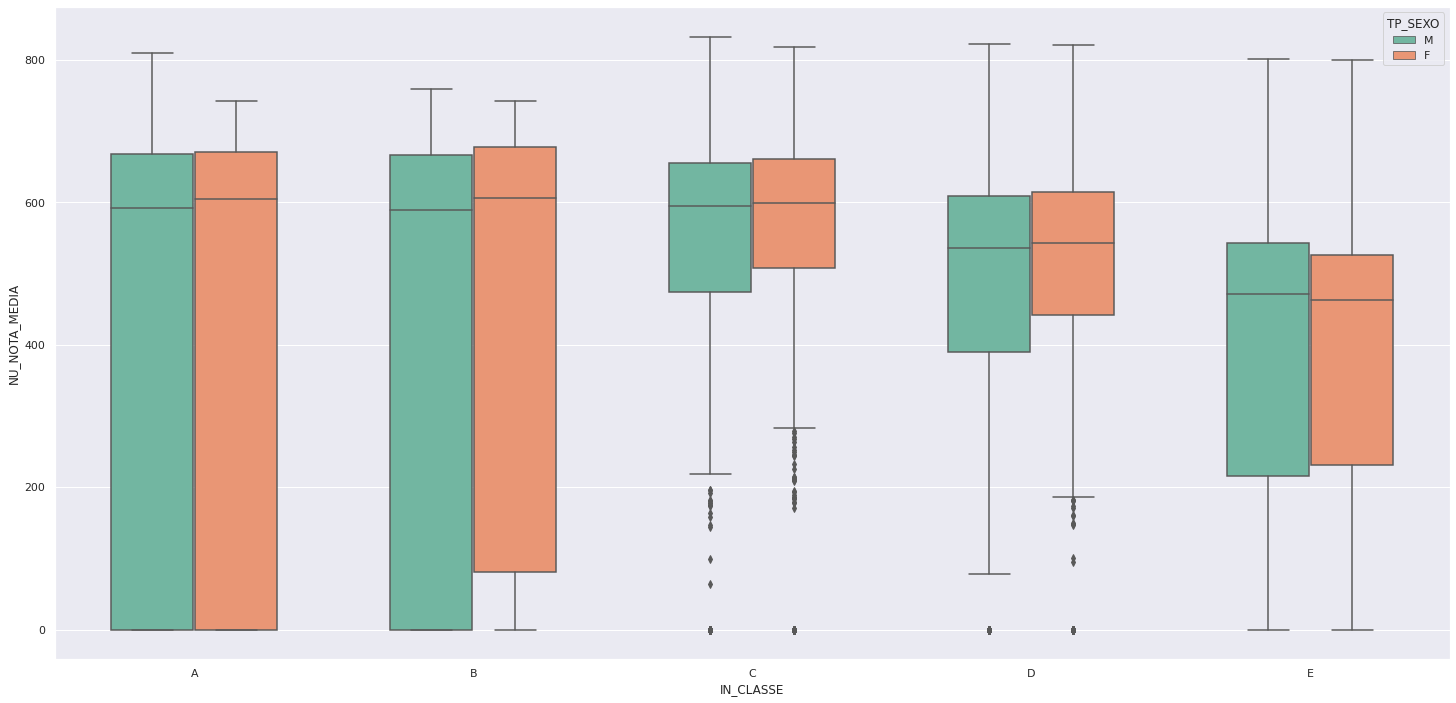

In [55]:
classeSocial = ['A', 'B', 'C', 'D', 'E']

sns.boxplot(x='IN_CLASSE', y='NU_NOTA_MEDIA', data= dados, palette='Set2', hue='TP_SEXO', width= 0.6, order= classeSocial)

Neste gráfico nos deparamos com uma *situação interessante*. Ao mesmo tempo que instiguei a situação ***dos faltantes em regiões, escolaridades, cores de pele e raças***, a distoente não parece ser verdadeira *conforme a classe social do participante cresce*. Enquanto a *classe E*, que é a maioria, está entre 200 e 550, a situação parece ser crescente. A *classe D* sobe a média dos participantes anteriores, a *classe C* a mesma coisa, entretando na classe B e A as notas médias tendem a zero, o que quer dizer que as *classe B* e A faltaram na prova com muita frequência. Provavelmente ***por que não estão preocupados com sua situação em concorrer*** por vagas em escolas públicas?!

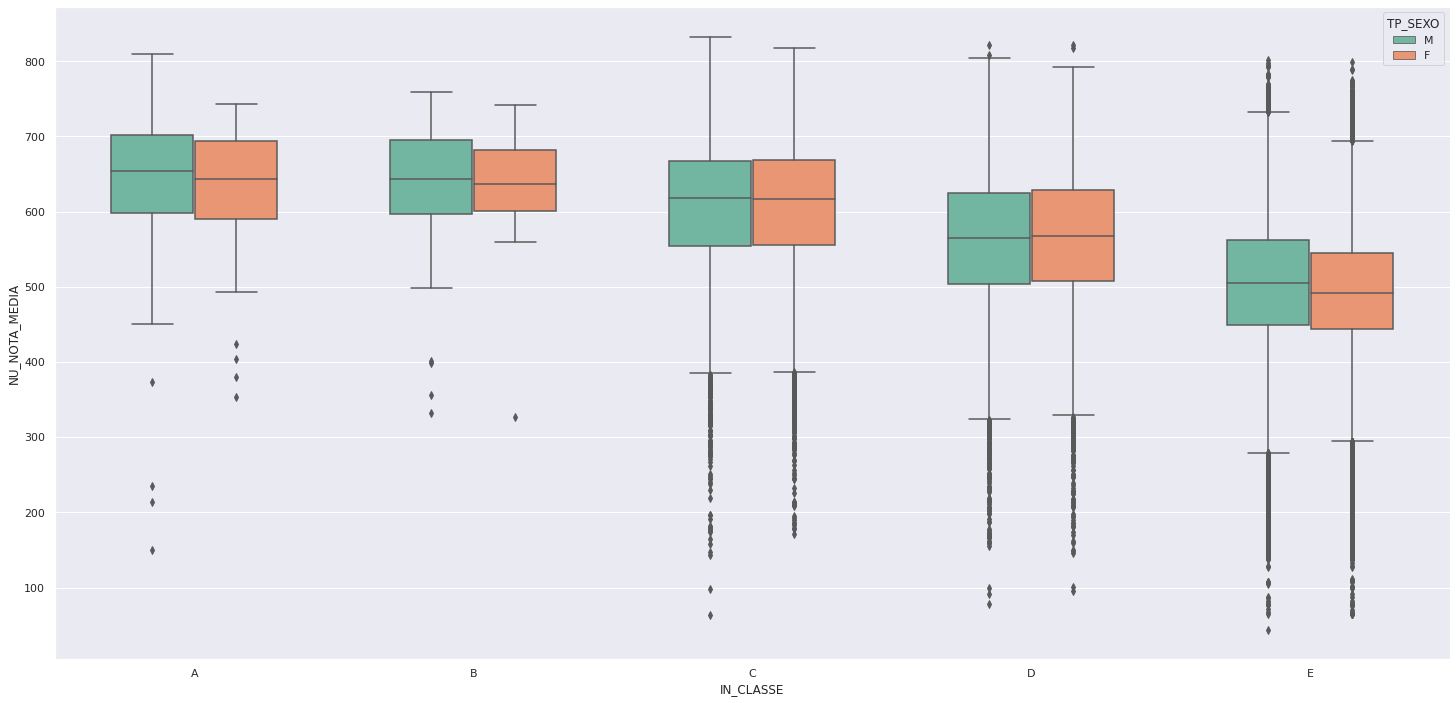

In [180]:
sns.boxplot(x='IN_CLASSE', y='NU_NOTA_MEDIA', data= nota_sem_zero, palette='Set2', hue='TP_SEXO', width= 0.6, order= classeSocial)

Talvez a *preocupação em estar presente* na prova não represente o seu *potencial de desemepenho*. Aqui está mais um agravante em que, novamente, os inscritos com melhor **situação socioeconômica** tem desemepenho **MUITO** superior aos outros. Escolaridade, desempenho e dinheiro são, sem dúvidas, correlatas e sobem juntas.

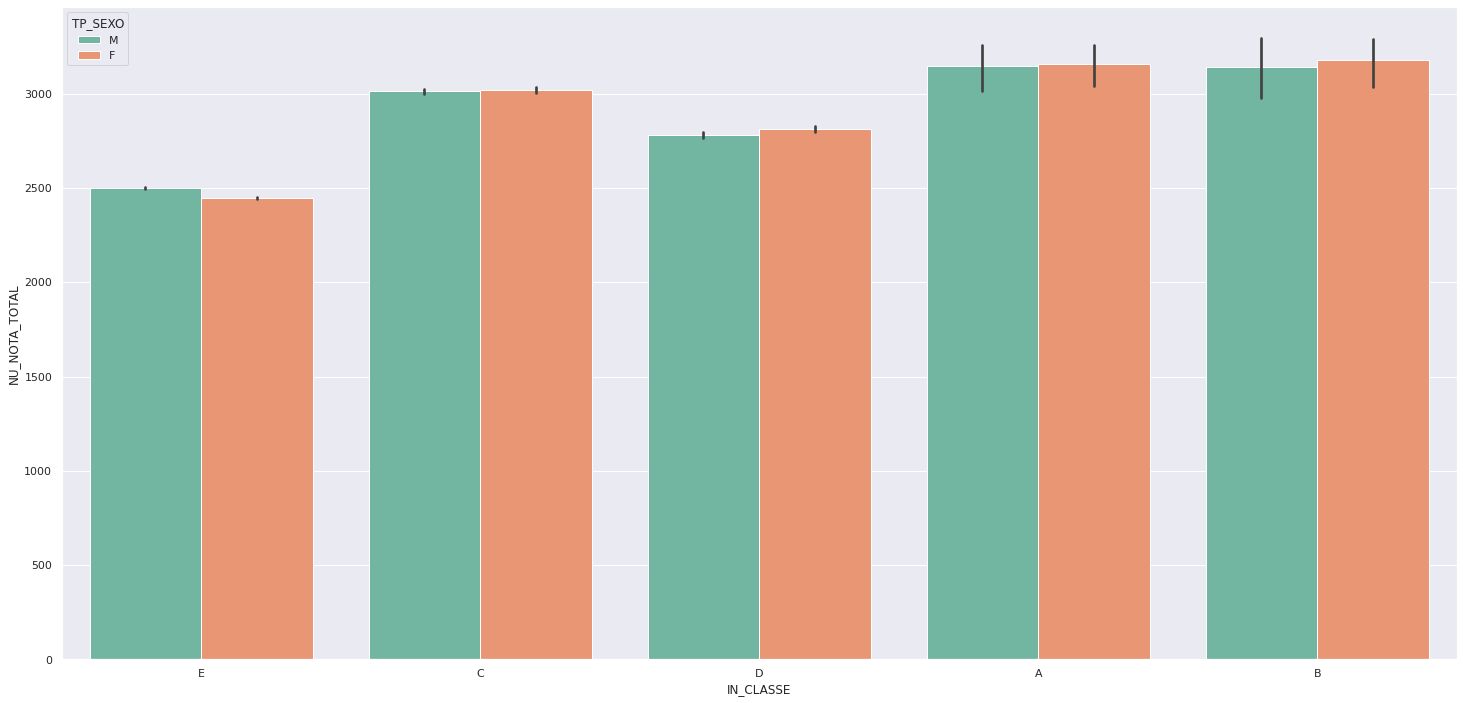

In [189]:
sns.barplot(x='IN_CLASSE', y='NU_NOTA_TOTAL', data= nota_sem_zero, palette='Set2', hue='TP_SEXO', order= classeSocial)

A difereça entre classe econômica distoa a nota novamente, os inscritos de *classe E* mantém **sua nota abaixo a todas as outras classe**, no entanto a *classe D e C* estão com **médias superiores** a de *classe B e A*. Interessante também que as *classes B e A* tem, pontualmente notas foras destes padrões, tanto para cima, quanto para baixo.